In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Import Data

In [2]:
df = pd.read_excel("default.xlsx")
df.info()
#this shows the 30,000 observations each with 24 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30001 non-null  int64
 1   LIMIT_BAL                   30001 non-null  int64
 2   SEX                         30001 non-null  int64
 3   EDUCATION                   30001 non-null  int64
 4   MARRIAGE                    30001 non-null  int64
 5   AGE                         30001 non-null  int64
 6   PAY_0                       30001 non-null  int64
 7   PAY_2                       30001 non-null  int64
 8   PAY_3                       30001 non-null  int64
 9   PAY_4                       30001 non-null  int64
 10  PAY_5                       30001 non-null  int64
 11  PAY_6                       30001 non-null  int64
 12  BILL_AMT1                   30001 non-null  int64
 13  BILL_AMT2                   30001 non-null  int64
 14  BILL_A

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
print('hello')

hello


# 2. Data Preprocessing and Explatory Analysis

In [5]:
df.isnull().values.any()
#on first glance the dataset seems cleaned and fit for purpose in regards to data analysis due to the absence of missing
#values but upon further inspection this is not the case
#for example some of the columns aren't names cleanly/correctly e.g. pay_0 should be pay_1 and default payment, 
#can be simplified, the ID

False

In [6]:
#tidying up the actual dataset headers

df.rename(columns = {"PAY_0" : "PAY_1"}, inplace = True)
df.rename(columns = {"default payment next month" : "Default"}, inplace = True)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [8]:
#getting rid of ID column and first row as they aren't needed and clog up the dataset 
df.drop("ID", axis = 1, inplace = True)
updated_df = (df.drop(df.index[0]))
df = updated_df
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df['SEX'].value_counts()
#this data is okay and doesn't need any manipulation

2    18112
1    11888
Name: SEX, dtype: int64

In [10]:
df['Default'].value_counts()
#this data is also okay and doesnt need any manipulation

0    23364
1     6636
Name: Default, dtype: int64

In [11]:
df['MARRIAGE'].value_counts()
#here we are needing to deal with the presence of the 0 as it is not listed in the description of the dataset

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
df['EDUCATION'].value_counts()
#here we are needing to deal with the presence of the 0's, 5's and 6's as they are not listed in the datasets description

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

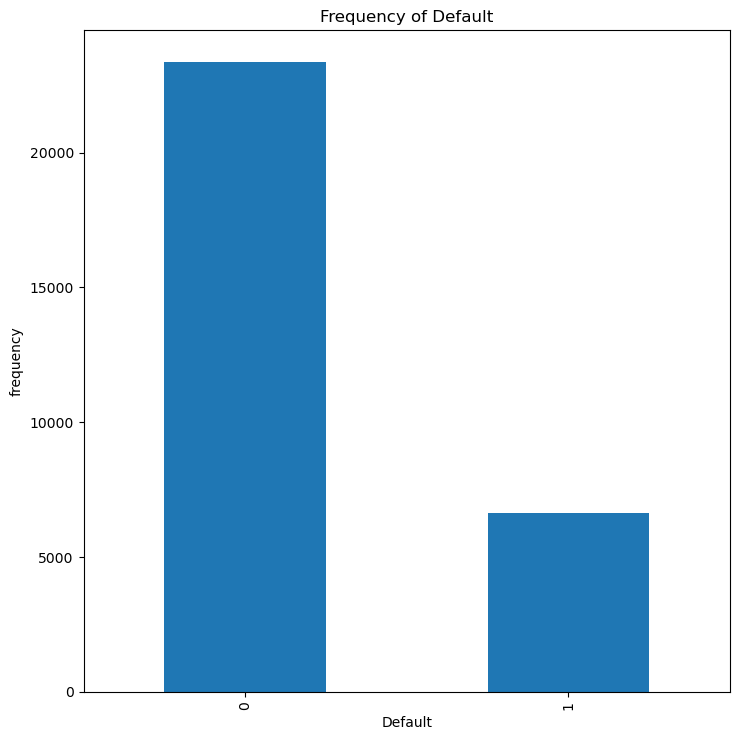

In [13]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['Default'].value_counts().plot(ax=ax, kind='bar', xlabel='Default', ylabel='frequency', title= 'Frequency of Default')
plt.show()
#Larger proportion of not default than default which is to be expected and a good balance so we wont need to take
#a subset to find significant correlations in the dataset
#0 == Not Default
#1 == Default 

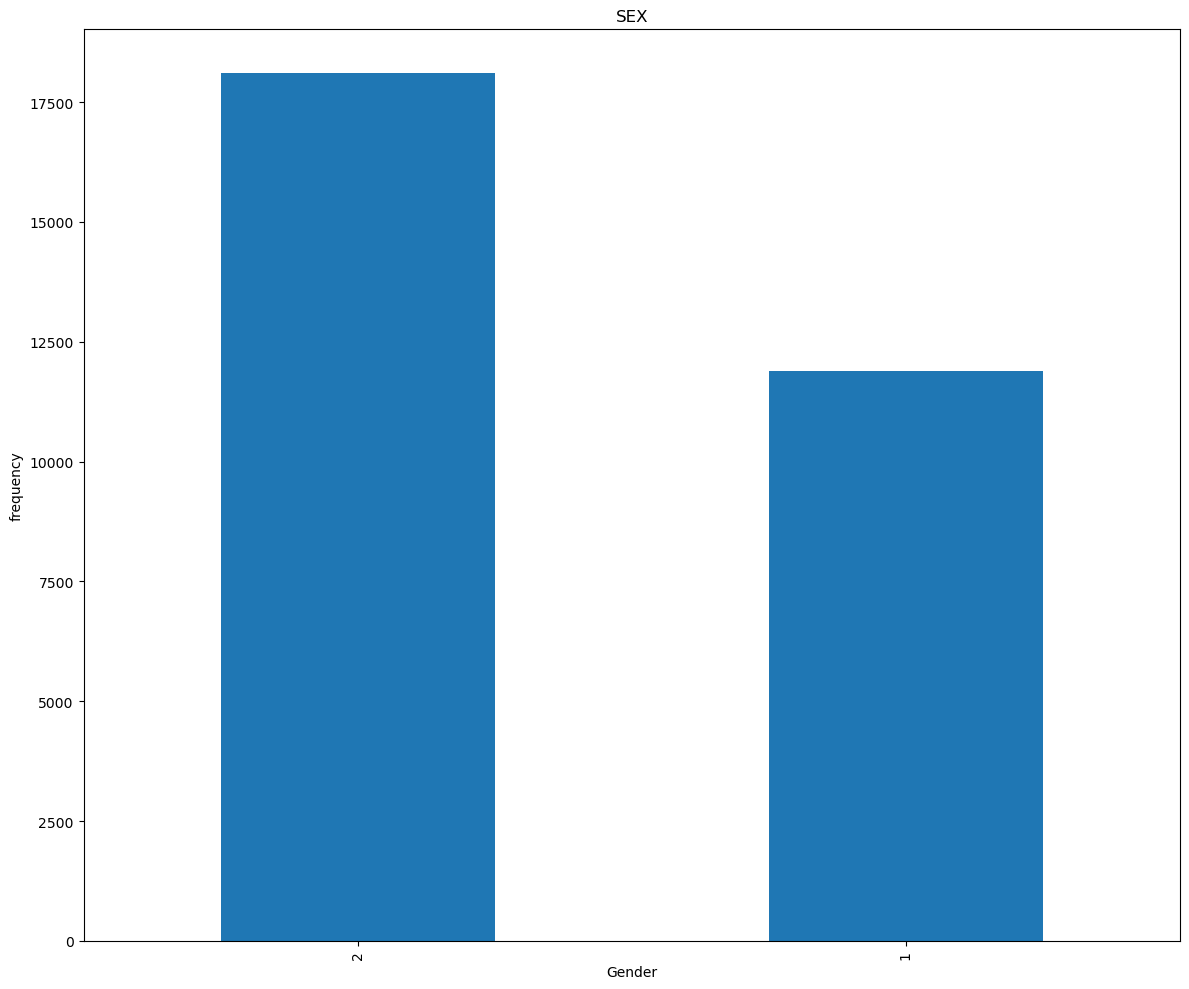

In [14]:
plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['SEX'].value_counts().plot(ax=ax, kind='bar', xlabel='Gender', ylabel='frequency', title= 'SEX')
plt.show()
#there are significantly more women in the dataset than men
#1 == Male
#2 == Female

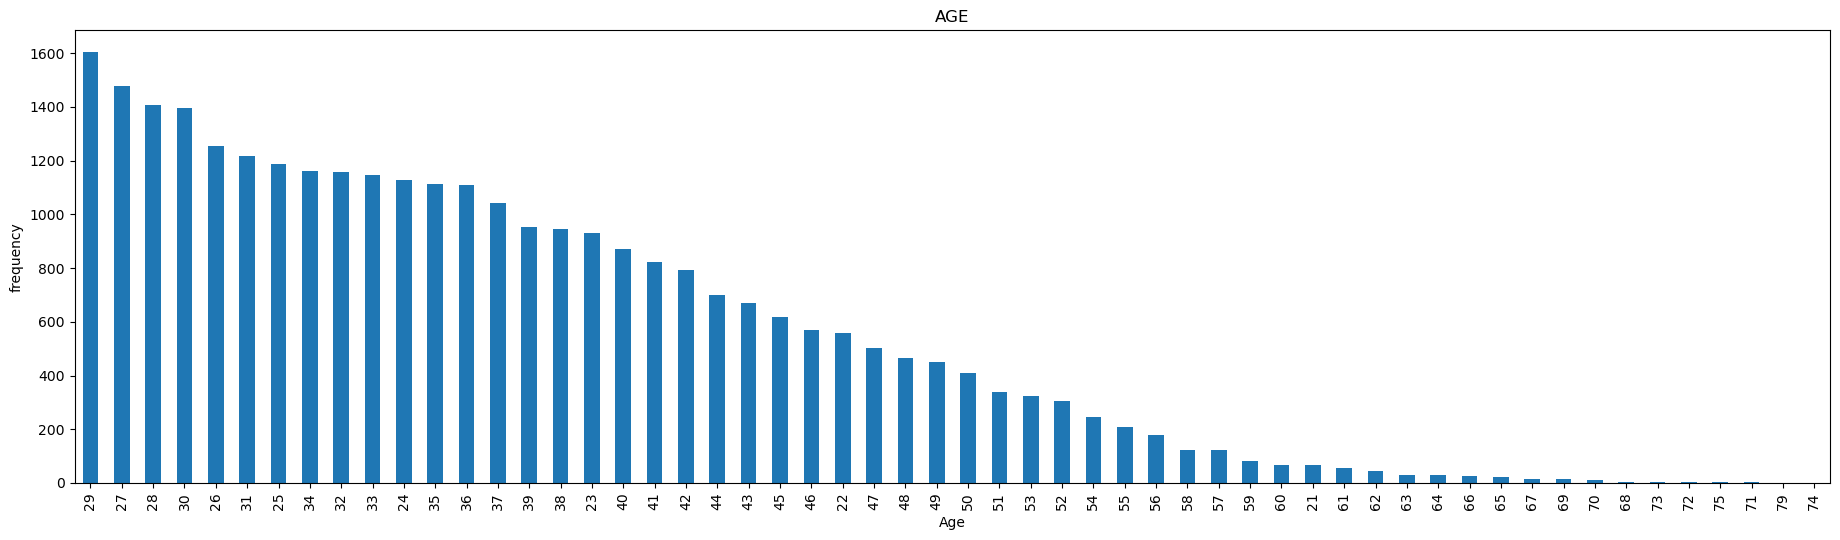

In [15]:
plt.rcParams["figure.figsize"] = [18.50, 5.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['AGE'].value_counts().plot(ax=ax, kind='bar', xlabel='Age', ylabel='frequency', title= 'AGE')
plt.show()
#wide range of ages with the mode being 29 with ages 25-34 most represented 

In [16]:
#in the case of our dataset, we need to deal with the anomalous values i.e. 
#MARRIAGE : 0 values (54)
#EDUCATION 0, 5 and 6 values (14, 280, 51 respectively)
#in total these come to 399 indivudal pieces of data which is an insiginificant amount in the wider context of the dataset
#therefore they can simply be deleted 
df.drop(df[df['MARRIAGE'] == 0].index, inplace = True)
df.drop(df[df['EDUCATION'] == 0].index, inplace = True)
df.drop(df[df['EDUCATION'] == 5].index, inplace = True)
df.drop(df[df['EDUCATION'] == 6].index, inplace = True)
df.LIMIT_BAL.describe()

count      29601.000000
mean      167550.544914
std       129944.020953
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

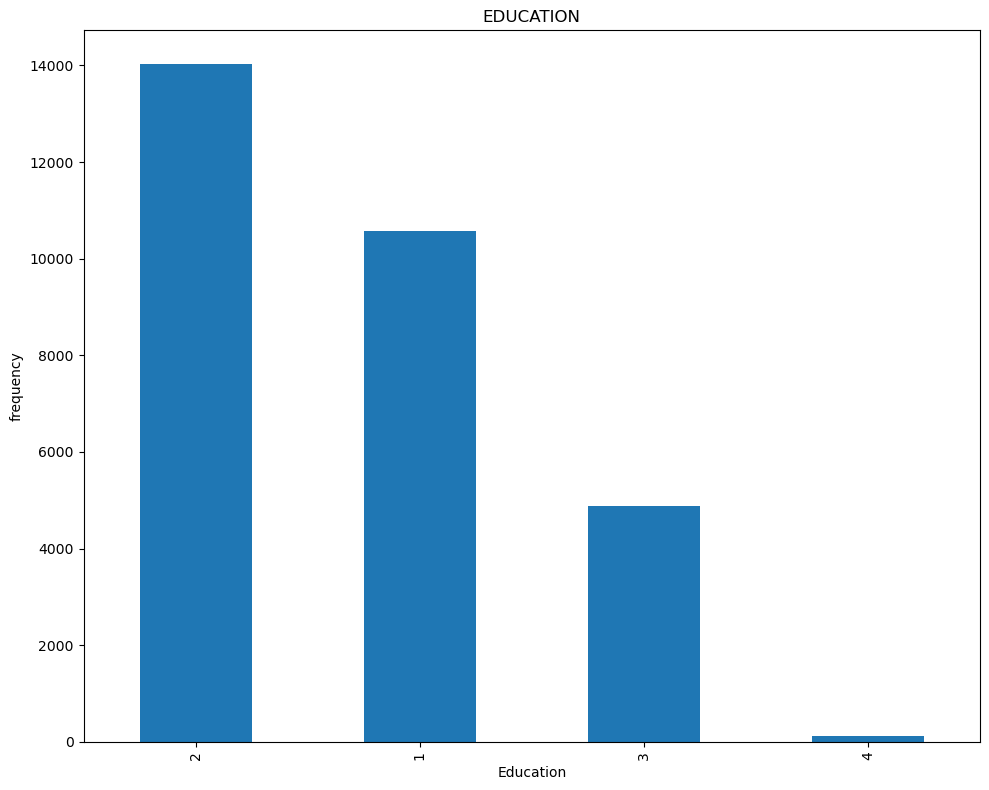

In [17]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['EDUCATION'].value_counts().plot(ax=ax, kind='bar', xlabel='Education', ylabel='frequency', title= 'EDUCATION')
plt.savefig('Fig - barchart')
plt.show()
#1 == Graduate School
#2 == University
#3 == High School
#4 == Others

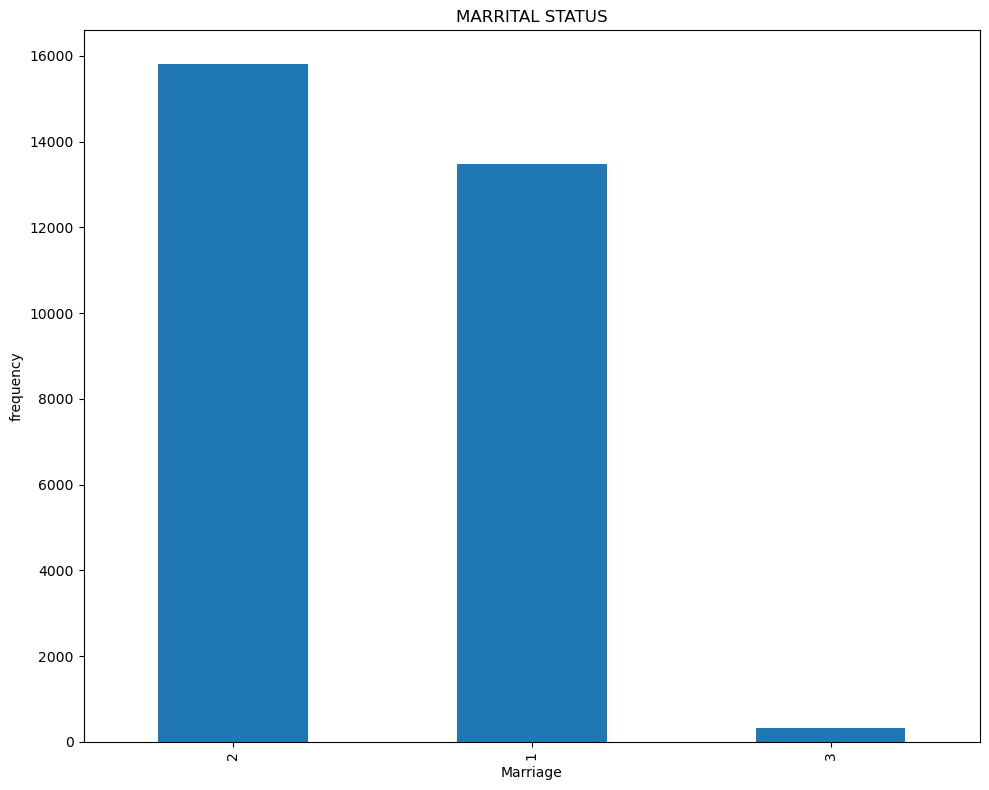

In [18]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
df['MARRIAGE'].value_counts().plot(ax=ax, kind='bar', xlabel='Marriage', ylabel='frequency', title= 'MARRITAL STATUS')
plt.savefig('Fig - barchart')
plt.show()

#1 == married
#2 == single
#3 == other

In [19]:
#when closely analysing the data in PAY_1 -> PAY_6 the datasets description tells us the values range from -1 to 9 
#where -1 is pay duly (they pay on time) and -1 meaning 1 month late, 2 meaning 2 months late etc, until 9
#which means 9 months or above
#HOWEVER when analysing the data closely we can see that the range of values is -2 to 8 which insinuates a scaling error
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [20]:
#Therefore to ammend this, we can add one to each of the PAY_X columns 
df['PAY_1'] = df['PAY_1'] + 1
df['PAY_2'] = df['PAY_2'] + 1
df['PAY_3'] = df['PAY_3'] + 1
df['PAY_4'] = df['PAY_4'] + 1
df['PAY_5'] = df['PAY_5'] + 1
df['PAY_6'] = df['PAY_6'] + 1

df.PAY_1.value_counts()
#however using PAY_1 as an example to see the output we see that we still have a value of 0, which is undocummented

 1    14499
 0     5633
 2     3662
-1     2708
 3     2640
 4      320
 5       76
 6       24
 9       19
 7       11
 8        9
Name: PAY_1, dtype: int64

In [21]:
#therefore to deal with this, we will group 0 and -1 as a value of 0 insinuates an ontime payment 
#we will be using a numpy function np.where() to achieve this 
#therefore when combining the values of 0 and -1 we should have 8341 instances where the individual paid on time when using
#PAY_1 as an example 
#MAYBE WANNA THINK ABOUT COMBINING 0 AND 1
import numpy as np
df['PAY_1'] = np.where(df['PAY_1'] == 0, -1, df['PAY_1'])
df['PAY_2'] = np.where(df['PAY_2'] == 0, -1, df['PAY_2'])
df['PAY_3'] = np.where(df['PAY_3'] == 0, -1, df['PAY_3'])
df['PAY_4'] = np.where(df['PAY_4'] == 0, -1, df['PAY_4'])
df['PAY_5'] = np.where(df['PAY_5'] == 0, -1, df['PAY_5'])
df['PAY_6'] = np.where(df['PAY_6'] == 0, -1, df['PAY_6'])
df.PAY_1.value_counts()

 1    14499
-1     8341
 2     3662
 3     2640
 4      320
 5       76
 6       24
 9       19
 7       11
 8        9
Name: PAY_1, dtype: int64

In [22]:
df.LIMIT_BAL.describe()
#Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her 
#family (supplementary) credit.

count      29601.000000
mean      167550.544914
std       129944.020953
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

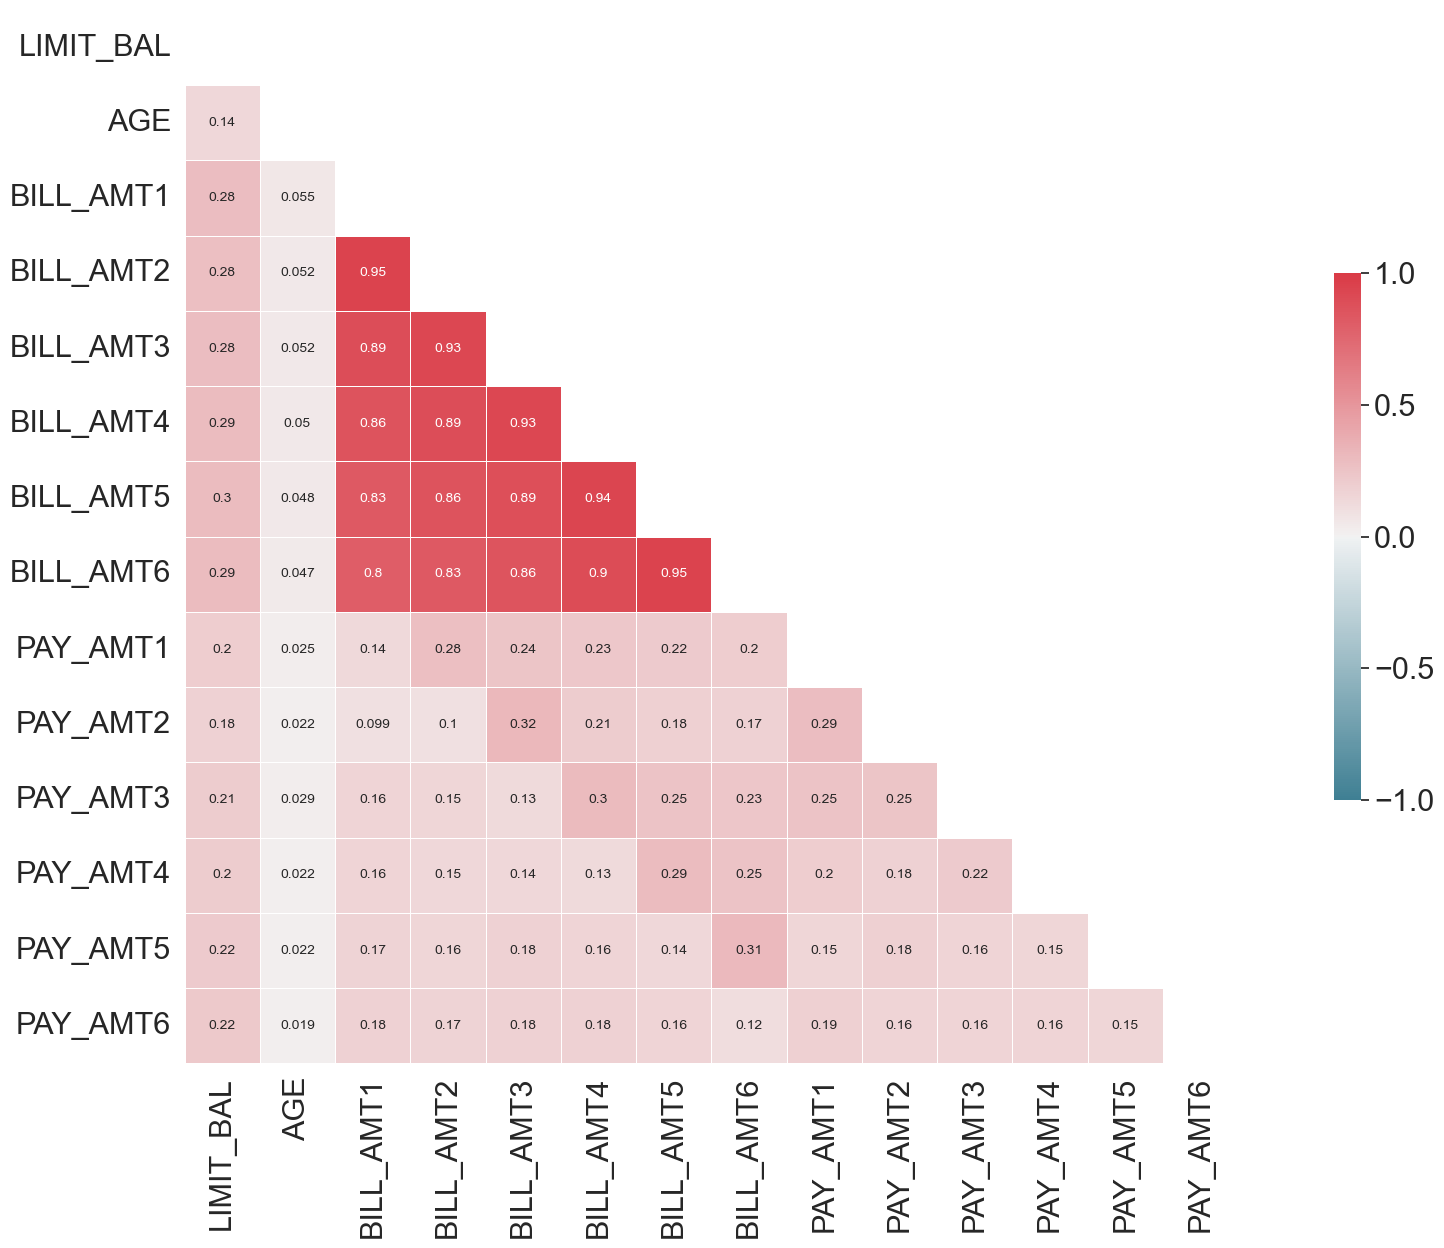

In [23]:
import seaborn as sns

sns.set(style="white", font_scale=2)
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
corr = df[numeric].corr() 

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

#This correlation matrix shows us that all variables are at least positively correlated however certain ones have a pearson
#correlation co-efficients, for example 
#BILL_AMT5 & BILL_AMT6 and BILL_AMT1 & BILL_AMT2 both have P = 0.95
#BILL_AMT2 & BILL_AMT3 and BILL_AMT3 & BILL_AMT4 both have P = 0.93
#BILL_AMT4 & BILL_AMT5 have a p = 0.94

#COPIED CODE FROM EXAMPLE.

In [104]:
#DATA PRE-PROCESSING

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['LIMIT_BAL'] = scaler.fit_transform(df['LIMIT_BAL'].values.reshape(-1, 1))
df['AGE'] = scaler.fit_transform(df['AGE'].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    df['PAY_' + str(i)] = scaler.fit_transform(df['PAY_' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    df['BILL_AMT' + str(i)] = scaler.fit_transform(df['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    df['PAY_AMT' + str(i)] = scaler.fit_transform(df['PAY_AMT' + str(i)].values.reshape(-1, 1))
    
#applied the min/max scalars on all the variables
#as input variables may have different units, they could have different scales and magnitudes so a scalar is used to fit 
#all features between the values of 0-1, with 0 being the minimum values and 1 being the maximum.
#i.e. for the purpose of normalization, this scalar was applied to all attributes so they all have the same scale
#else comparisons are impossible.

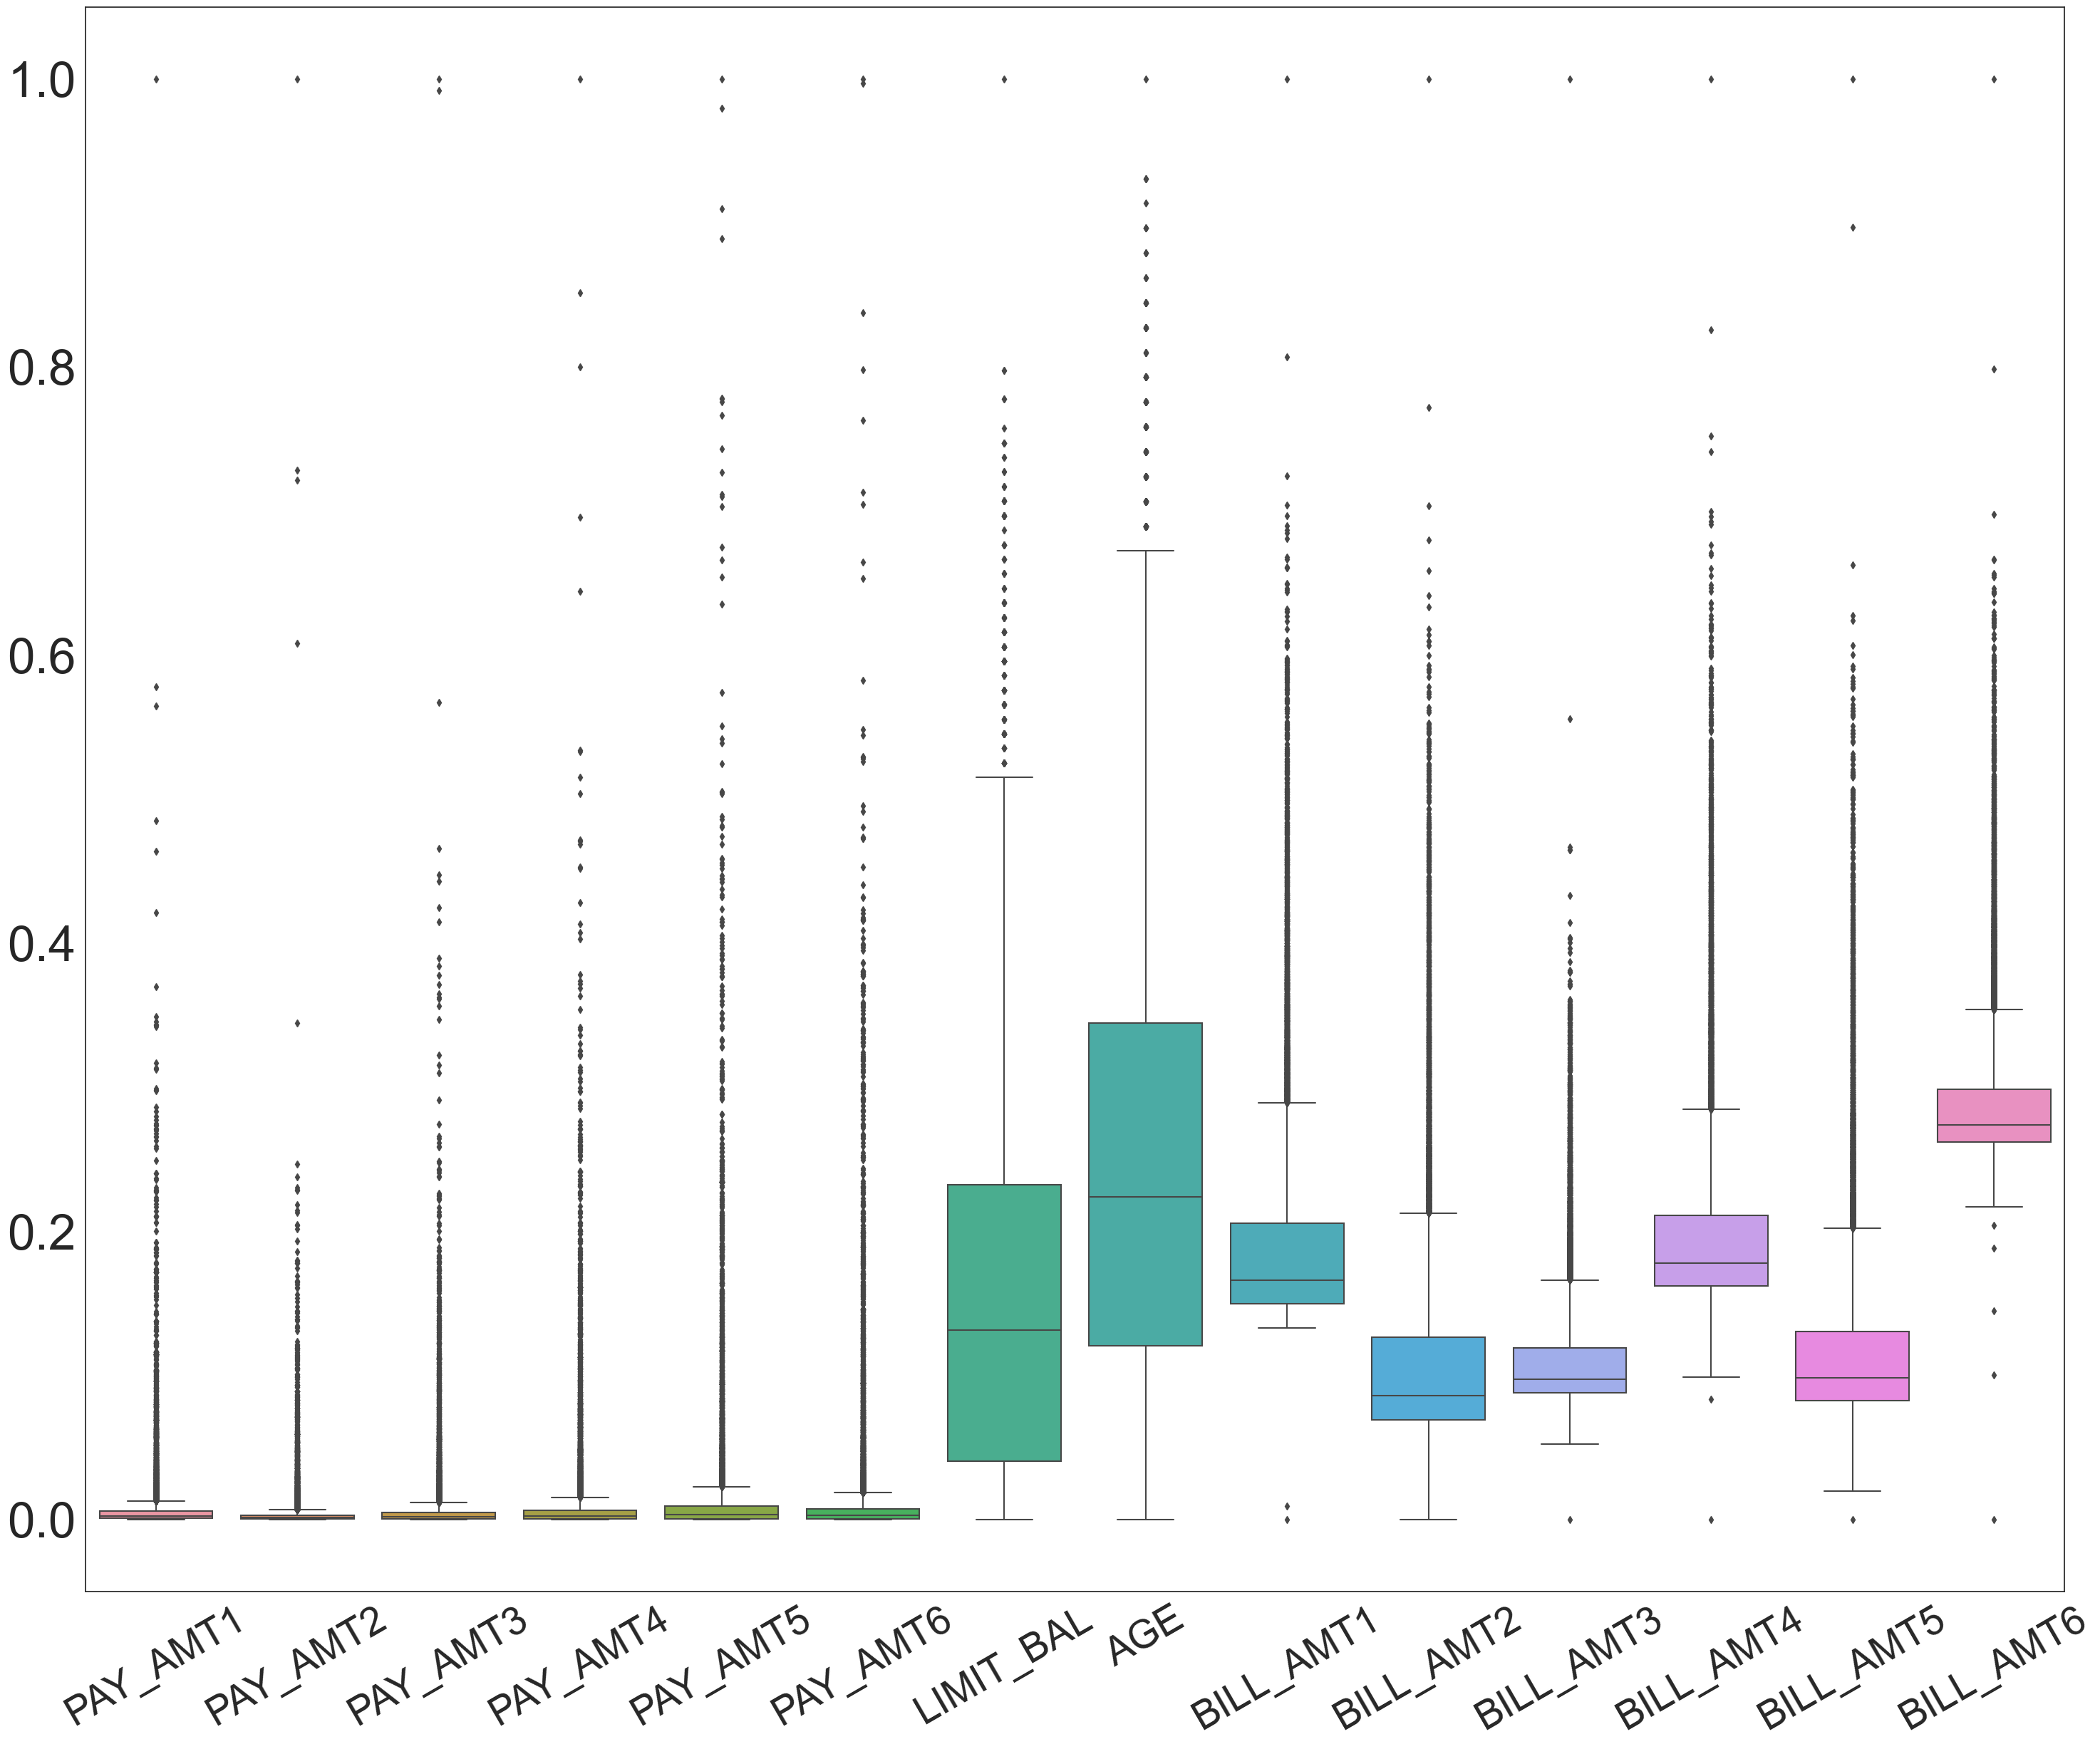

In [143]:
# BOXPLOT
attributes = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

fig=plt.figure(1, figsize=(30,25))
ax=fig.add_subplot(111)
sns.boxplot(data=df[attributes], )
plt.xticks(np.arange(0,14), labels=cols, rotation=30, fontsize=40)
plt.yticks(fontsize=50)

plt.savefig('Fig - Boxplot')


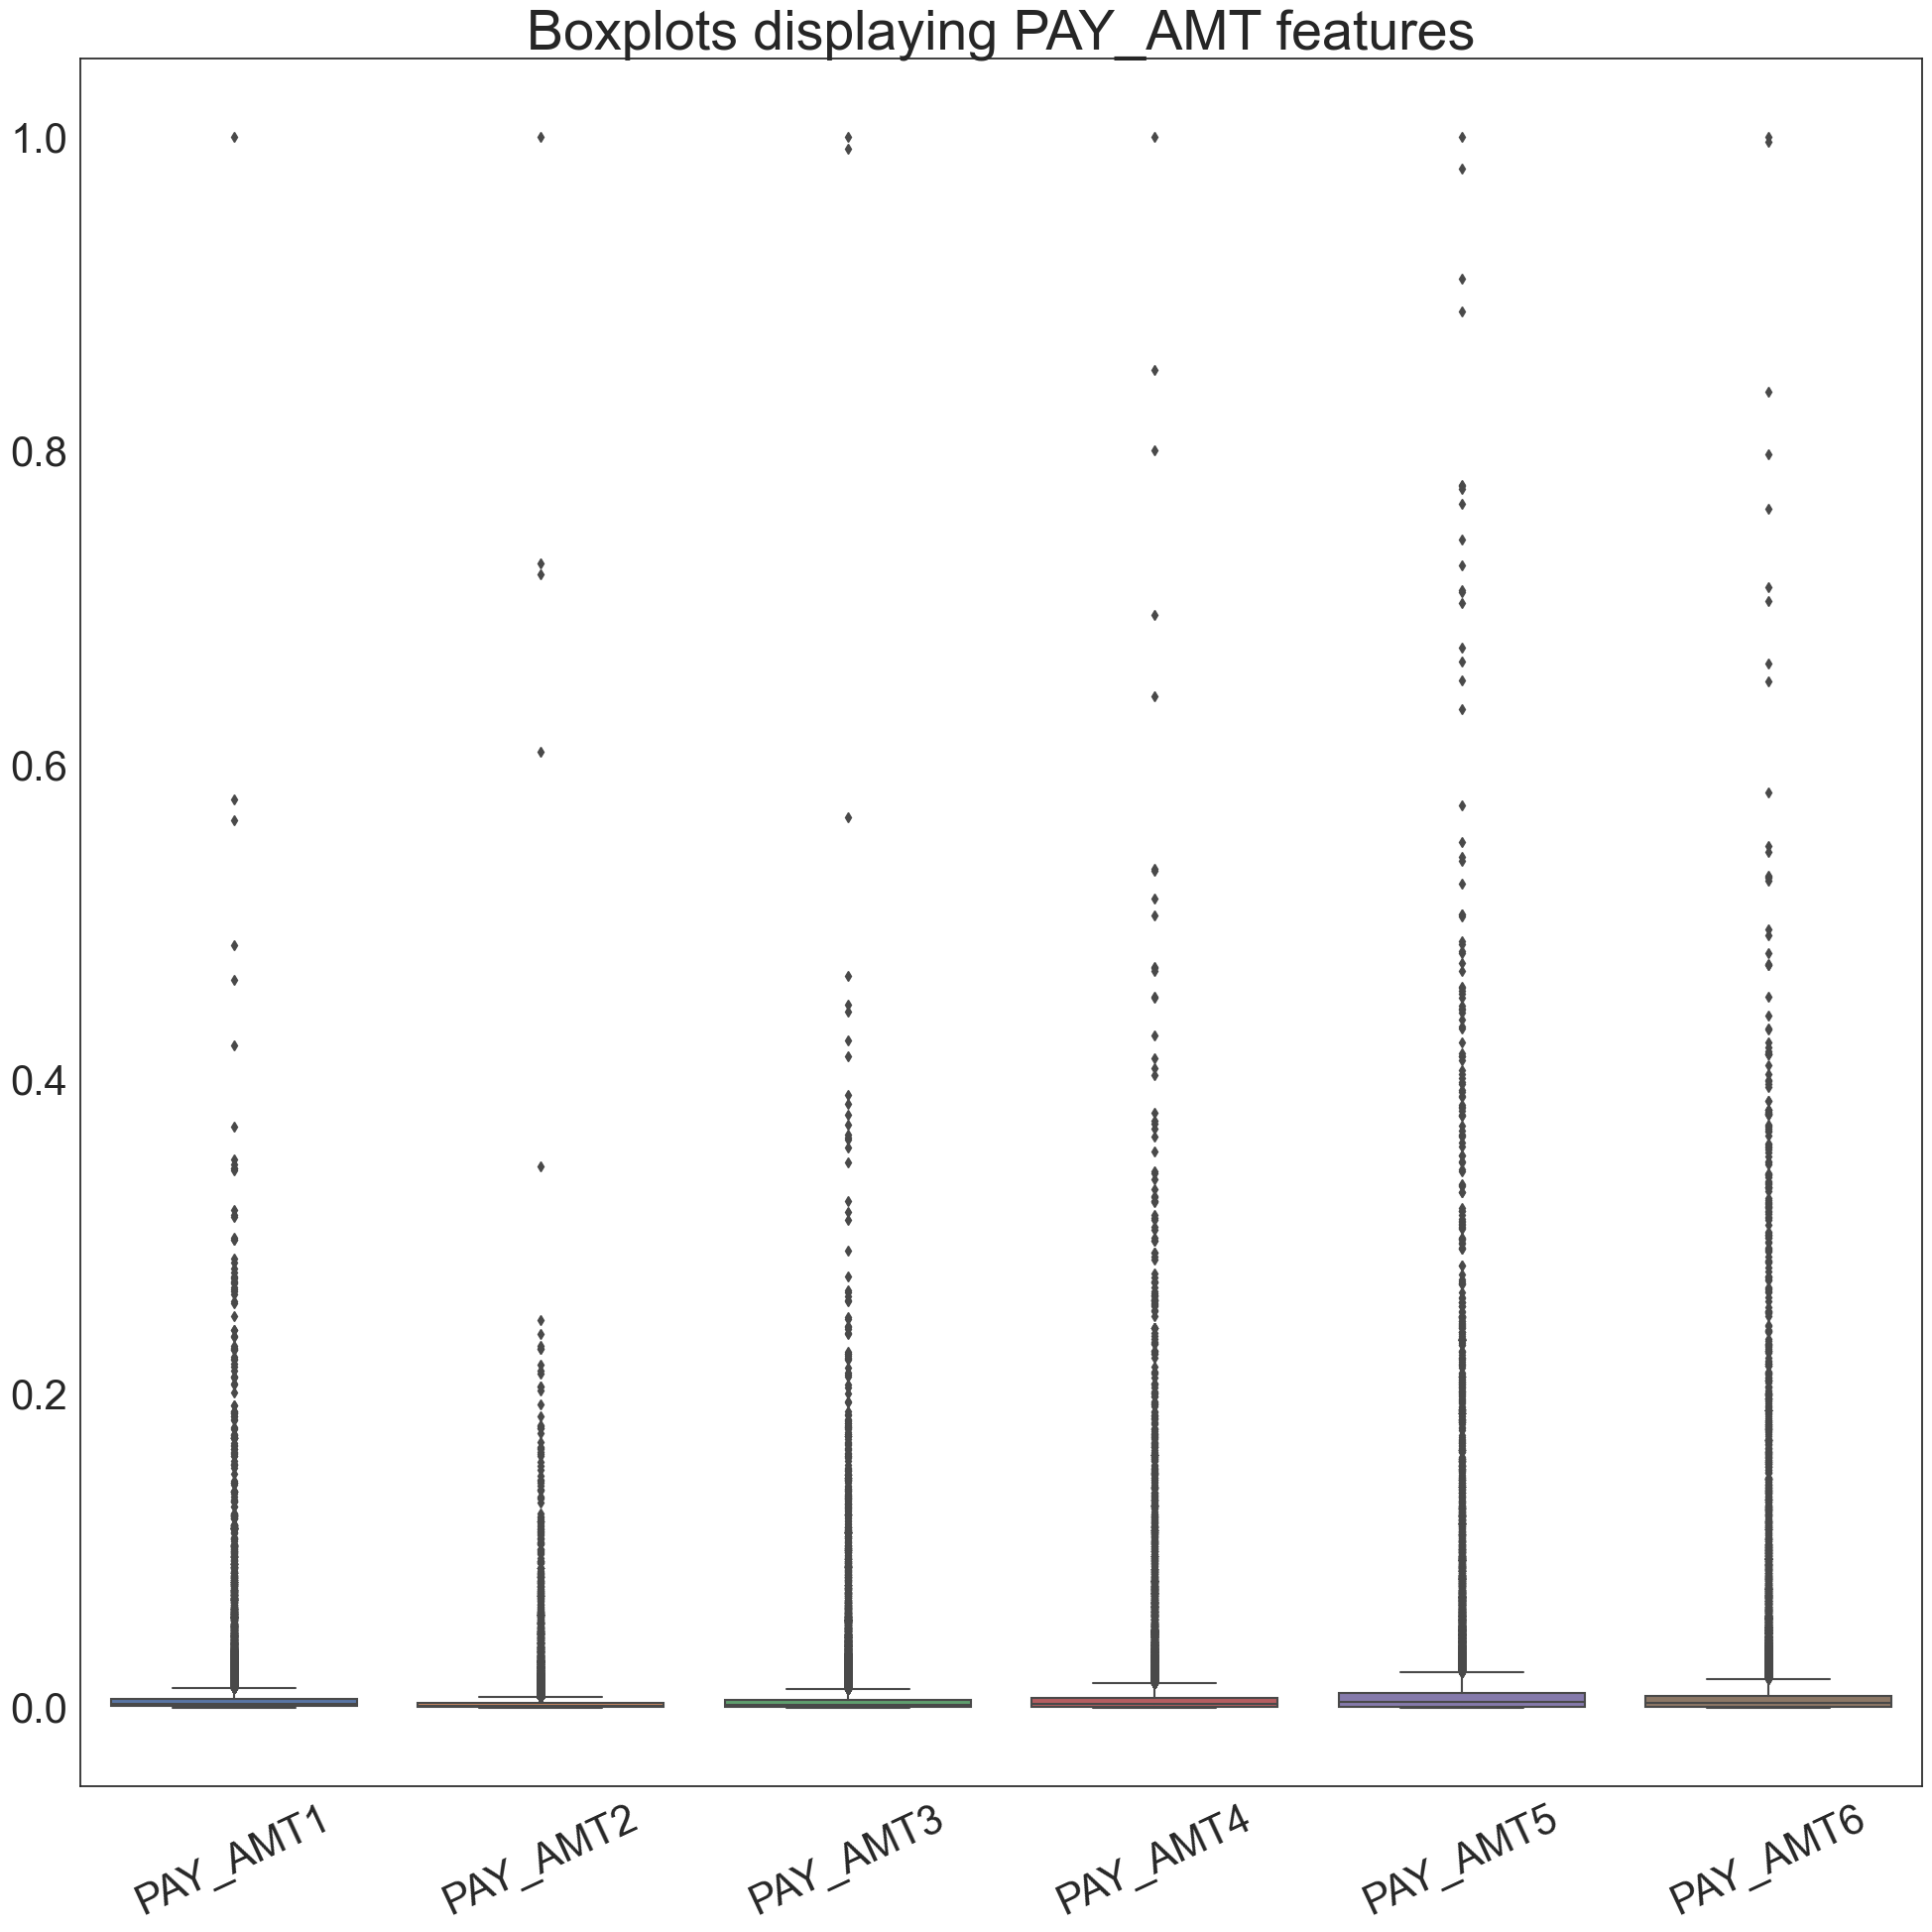

In [119]:
cols = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
fig=plt.figure(1, figsize=(20,20))
ax=fig.add_subplot(111)
sns.boxplot(data=df[cols], )
plt.xticks(np.arange(0,6), labels=cols, rotation=25, fontsize=30)
plt.yticks(fontsize=30)
plt.title('Boxplots displaying PAY_AMT features', fontsize= 40)


plt.savefig('Fig - Boxplot')


In [28]:
#the features Sex, Education and Marriage currently are encoded with integers, however this may return us some ordinal
#relationships, where said relationship does not exist, therefore one-hot encoding is a data pre-processing method we
#have chosen to implement. This means instead of a integer encoding, a binary encoding is used where
#e.g. with Sex 1 == male == 10, 2 == female == 01
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
  df[att] = df[att].astype('category')

# one-hot encoding
df = pd.concat([pd.get_dummies(df['SEX'], prefix = 'SEX'),
                pd.get_dummies(df['EDUCATION'], prefix = 'EDUCATION'), 
                pd.get_dummies(df['MARRIAGE'], prefix = 'MARRIAGE'),
                df], axis = 1)
#after this we are able to drop the original columns. 
df.drop(['SEX'], axis = 1, inplace = True)
df.drop(['EDUCATION'], axis = 1, inplace = True)
df.drop(['MARRIAGE'], axis = 1, inplace = True)

df.head()
#here we will see the one-hot encoding for the above 3 features, AND the features of BILL_AMTX and PAY_AMTX scaled with min_max

,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,0,1,0,1,0,0,1,0,0,0.010101,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
2,0,1,0,1,0,0,0,1,0,0.111111,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
3,0,1,0,1,0,0,0,1,0,0.080808,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
4,0,1,0,1,0,0,1,0,0,0.040404,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
5,1,0,0,1,0,0,1,0,0,0.040404,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


In [29]:
#however from our correlation matrix we saw that some features were not independant therefore we will remove all
#features where the pearson value was greater than or equal to 0.92
FEATURE_SELECTION = True

# if 'True' Feature Selection will be applied (i.e. 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' 
#will be removed)

if FEATURE_SELECTION:
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] >= 0.92)]
    print(to_drop) #['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    df = df.drop(df[to_drop], axis = 1)
    

df.head()

#In our data-analysis through our correlation matrix we found that the features BILL_AMT2 to BILL_AMT6 had a high pearson 
#coefficent, therefore removing these from the dataset will help keep our data finding relevant and not include 
#information that would be redundant
#Therefore, those features printed below have been removed 

['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,0,1,0,1,0,0,1,0,0,0.010101,...,0.0,0.0,0.149982,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
2,0,1,0,1,0,0,0,1,0,0.111111,...,0.2,0.4,0.148892,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
3,0,1,0,1,0,0,0,1,0,0.080808,...,0.2,0.2,0.172392,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
4,0,1,0,1,0,0,1,0,0,0.040404,...,0.2,0.2,0.188100,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
5,1,0,0,1,0,0,1,0,0,0.040404,...,0.2,0.2,0.154144,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0


# Train Test Split

In [30]:
#before beginning with dimensionality reduction, we will initialize the test-train split
#To do this we will seperate the features (everything BUT Default) to the target (Default)
y = df.Default
X = df.drop('Default', axis = 1, inplace = False)

#checking this seperation is correct by checking the dimensions of X
print(X.shape)
print("Number of samples: ", X.shape[0])     #will give 29601, as its all original features, - the 399 dropped features
print("Number of attributes: ", X.shape[1])  #will give 29 as its all features - the target 

(29601, 24)
Number of samples:  29601
Number of attributes:  24


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
#random_state = 42 => means the dataset will be split completely randombly so our findings can be reproduced
#42 is an arbitary number used that is the standard across the machine learning world, the number can be anything but 
#42 is commonly used, and this will ensure the same set of pseudo-random numbers is generated each time we run the program
#test_size = 20%  => giving us an 80/20 split of the data 
#stratify = y => returns training and test subsets that have the same proportions of class labels as the input dataset

#CHECKING DIMENSIONS OF TRAIN AND TEST SETS
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-default (y=0): {len(Y_train[Y_train==0])}")
print(f" + Default (y=1):\t {len(Y_train[Y_train==1])}")

print("Test set:")
print(f" + Non-default (y=0): {len(Y_test[Y_test==0])}")
print(f" + Default (y=1):\t {len(Y_test[Y_test==1])}")

(23680, 24)
(5921, 24)
Training set:
 + Non-default (y=0): 18396
 + Default (y=1):	 5284
Test set:
 + Non-default (y=0): 4600
 + Default (y=1):	 1321


In [32]:
Y_train

28311    0
11111    0
11426    0
15626    0
14837    1
        ..
24688    1
21524    1
9801     0
11228    0
21731    0
Name: Default, Length: 23680, dtype: int64

# Dimensionality Reduction with PCA

Actual number of components: 24


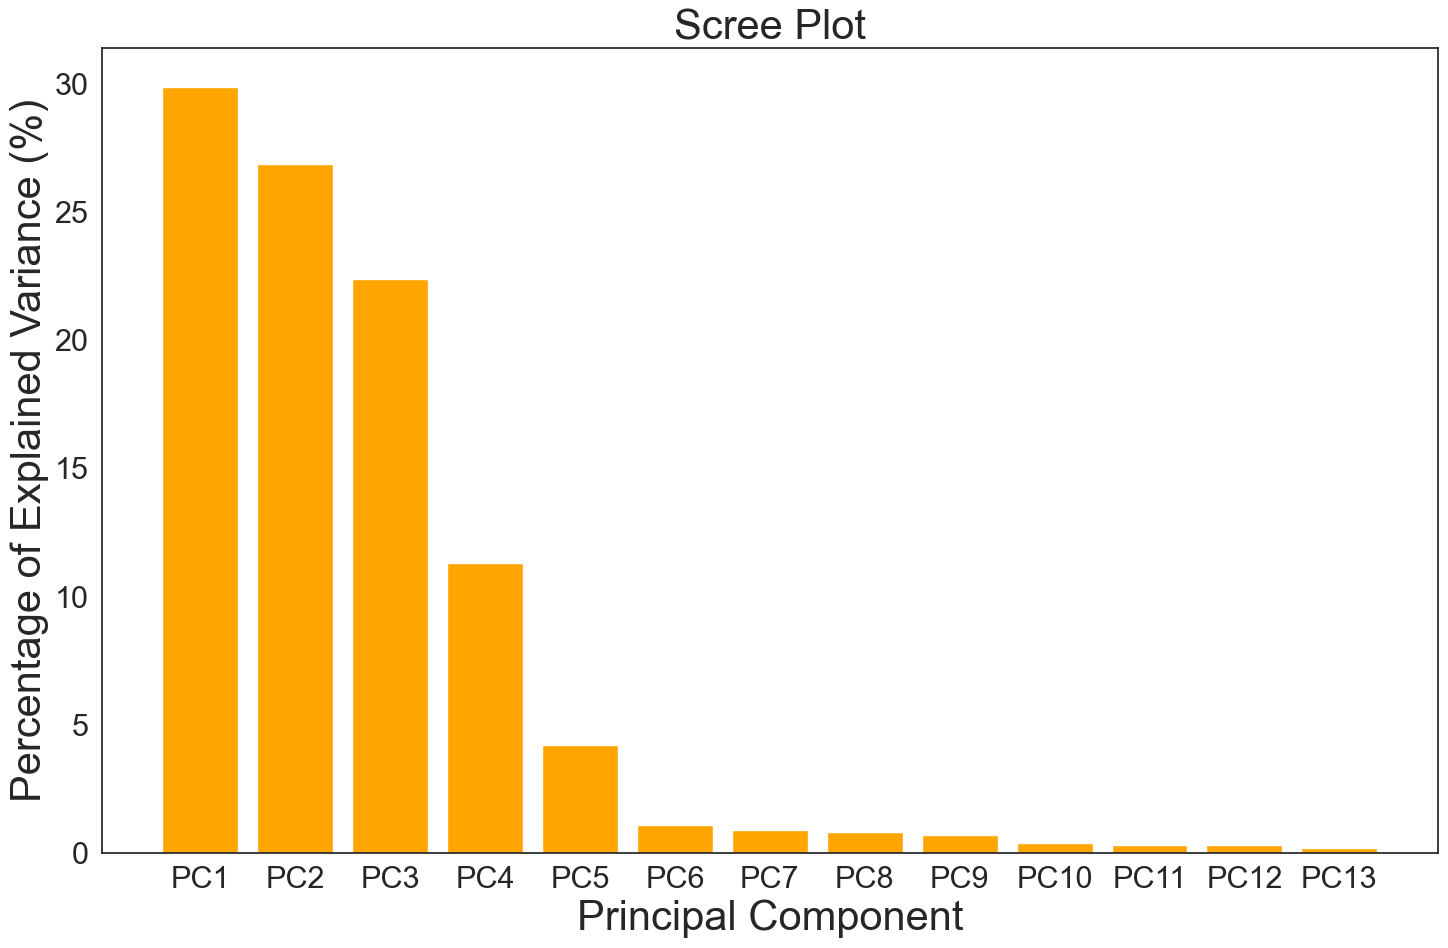

In [33]:
from sklearn.decomposition import PCA

print(f"Actual number of components: {len(X_train.columns.values)}")

n_pc = 13

pca = PCA(n_components=n_pc)
pca.fit(X_train)


per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig=plt.figure(1, figsize=(15,10))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels, color='orange')
plt.ylabel('Percentage of Explained Variance (%)', fontsize= 30)
plt.xlabel('Principal Component', fontsize= 30)
plt.title('Scree Plot', fontsize= 30)
plt.show()
 


In [34]:
#Selecting 8 PCs
n_pc = 8
pca = PCA(n_components=n_pc)
pca.fit(X_train)
#   X_train_val.index = pd.RangeIndex(start=0, stop=len(X_train_val), step=1)
PCA_train = pd.DataFrame(pca.transform(X_train))
PCA_test = pd.DataFrame(pca.transform(X_test))
PCA_train.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
PCA_test.columns = ['PC' + str(i) for i in range(1, n_pc+1) ]
PCA_train.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.348769,-0.685583,0.052446,1.050756,-0.505407,0.044744,-0.091526,0.078781
1,-0.643369,1.061405,-0.293921,-0.296757,-0.422651,-0.071011,0.097338,-0.127969
2,-1.059198,-0.272939,-0.287798,-0.231995,0.036354,0.035579,-0.019102,-0.064368
3,-1.042894,-0.286342,-0.294461,-0.240933,-0.040546,-0.183232,0.059585,-0.054887
4,-0.514051,-0.408130,1.048032,-0.404978,-0.246170,0.089340,0.009310,-0.055133


In [35]:
PCA_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.769286,0.675725,-0.057431,1.075088,-0.108067,-0.130132,0.025660,-0.037329
1,0.605444,0.681529,-0.923478,-0.032373,0.238283,-0.162749,0.018553,-0.015791
2,0.601177,0.675317,-0.885775,-0.063897,-0.015218,-0.054839,-0.063394,0.092831
3,0.186248,-0.674997,-0.834509,-0.037610,0.012350,-0.004759,-0.089587,0.109400
4,-1.048978,-0.278164,-0.300910,-0.229735,0.100738,-0.054603,-0.027735,0.039679


# Oversampling with SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=42)
X_res, y_res = sm.fit_resample(PCA_train, Y_train)

# Support Vector Machines and Hyperparameter Tuning

In [43]:
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import display


In [ ]:
### Quick Train PCA DATA AND SMOTE

# Train the SVM model
model = SVC()
model.fit(X_res, y_res)

# Make predictions on the testing data
Y_pred = model.predict(PCA_test)

# Evaluate the model's accuracy
print('Precision: %.3f' % precision_score(Y_test, Y_pred))
print('Recall: %.3f' % recall_score(Y_test, Y_pred))
print('F1: %.3f' % f1_score(Y_test, Y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))

In [37]:
# display("SVM")
SVM_CHART = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True)).transpose().round(3).loc[["0", "1", "macro avg"], ["precision", "recall", "f1-score"]]
display(SVM_CHART.style.set_caption("SVM"))
display(confusion_matrix(Y_test, Y_pred))

,precision,recall,f1-score
0,0.854000,0.847000,0.850000
1,0.481000,0.496000,0.488000
macro avg,0.668000,0.671000,0.669000


array([[3894,  706],
       [ 666,  655]])

In [76]:
### Quick Train PCA DATA AND SMOTE WITH HYPERPARAMETERS

# Train the SVM model
model = SVC(C=1000, kernel= 'rbf', gamma=100)
model.fit(X_res, y_res)

# Make predictions on the testing data
Y_pred = model.predict(PCA_test)

# Evaluate the model's accuracy
print('Precision: %.3f' % precision_score(Y_test, Y_pred))
print('Recall: %.3f' % recall_score(Y_test, Y_pred))
print('F1: %.3f' % f1_score(Y_test, Y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))

Precision: 0.331
Recall: 0.403
F1: 0.364
Accuracy: 0.685


In [75]:
# display("SVM")
SVM_CHART = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True)).transpose().round(3).loc[["0", "1", "macro avg"], ["precision", "recall", "f1-score"]]
display(SVM_CHART.style.set_caption("SVM"))
display(confusion_matrix(Y_test, Y_pred))

,precision,recall,f1-score
0,0.853000,0.781000,0.816000
1,0.412000,0.533000,0.465000
macro avg,0.633000,0.657000,0.640000


array([[3594, 1006],
       [ 617,  704]])

In [66]:
### Quick Train PCA DATA WITH STRONGERHYPERPARAMETERS

# Train the SVM model
model = SVC(C=10000, kernel= 'rbf')
model.fit(X_res, y_res)

# Make predictions on the testing data
Y_pred = model.predict(PCA_test)

# Evaluate the model's accuracy
print('Precision: %.3f' % precision_score(Y_test, Y_pred))
print('Recall: %.3f' % recall_score(Y_test, Y_pred))
print('F1: %.3f' % f1_score(Y_test, Y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))

# display("SVM")
SVM_CHART = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True)).transpose().round(3).loc[["0", "1", "macro avg"], ["precision", "recall", "f1-score"]]
display(SVM_CHART.style.set_caption("SVM"))
display(confusion_matrix(Y_test, Y_pred))

Precision: 0.467
Recall: 0.556
F1: 0.508
Accuracy: 0.759


,precision,recall,f1-score
0,0.865000,0.818000,0.841000
1,0.467000,0.556000,0.508000
macro avg,0.666000,0.687000,0.674000


array([[3761,  839],
       [ 586,  735]])

In [ ]:
### Quick Train PCA DATA WITH FINAL HYPERPARAMETER SET

# Train the SVM model
model = SVC(C=10000, kernel= 'rbf',gamma=100)
model.fit(X_res, y_res)

# Make predictions on the testing data
Y_pred = model.predict(PCA_test)

# Evaluate the model's accuracy
print('Precision: %.3f' % precision_score(Y_test, Y_pred))
print('Recall: %.3f' % recall_score(Y_test, Y_pred))
print('F1: %.3f' % f1_score(Y_test, Y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))

# display("SVM")
SVM_CHART = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True)).transpose().round(3).loc[["0", "1", "macro avg"], ["precision", "recall", "f1-score"]]
display(SVM_CHART.style.set_caption("SVM"))
display(confusion_matrix(Y_test, Y_pred))

In [42]:
#Model Training SVM GRID SEARCH

param_grid_SVM = {
    'kernel': ["linear", "rbf","poly"],
    'C': [0.001,0.01,1,100],
    'class_weight': ["balanced"],
}

#BY DEFAULT STRATIFIED CROSS VALIDATOIN NO NEED TO SPECIFY

grid_search_svm = GridSearchCV(SVC(),param_grid_SVM, scoring = "roc_auc",cv = 10, return_train_score=True, n_jobs = -1, refit = False, verbose = True) 

grid_search_svm.fit(X_res, y_res)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 1, 100],
                         'class_weight': ['balanced'],
                         'kernel': ['linear', 'rbf', 'poly']},
             refit=False, return_train_score=True, scoring='roc_auc',
             verbose=True)

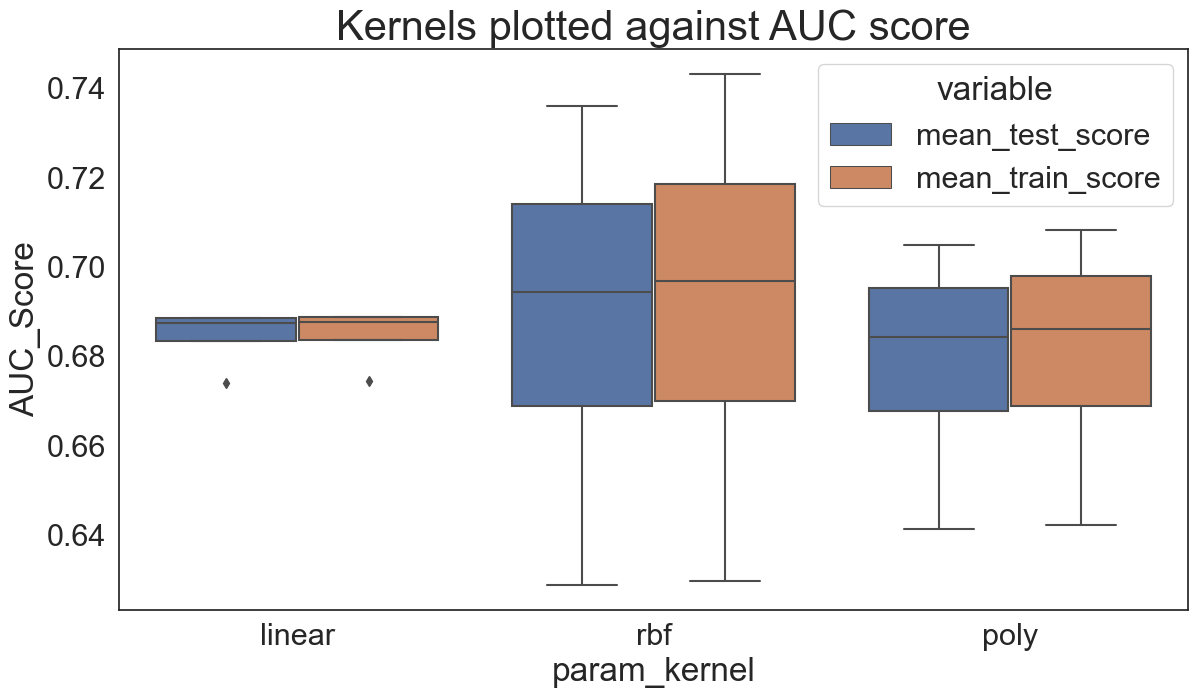

In [50]:
grid_search_svm_results = pd.DataFrame(grid_search_svm.cv_results_)

temp = pd.melt(grid_search_svm_results, id_vars=["param_kernel"], value_vars=['mean_test_score', 'mean_train_score'])
plt.rcParams["figure.figsize"] = [12.50, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.title('Kernels plotted against AUC score', fontsize= 30)
temp.rename(columns = {"value": "AUC_Score"}, inplace = True)
sns.boxplot(data = temp, x = "param_kernel", y = "AUC_Score", hue = "variable")
plt.show()
# sns.boxplot(data = grid_search_svm_results, x = "param_kernel", y = "mean_test_score")
# plt.show()
# sns.boxplot(data = grid_search_svm_results, x = "param_kernel", y = "mean_test_score")
# plt.show()


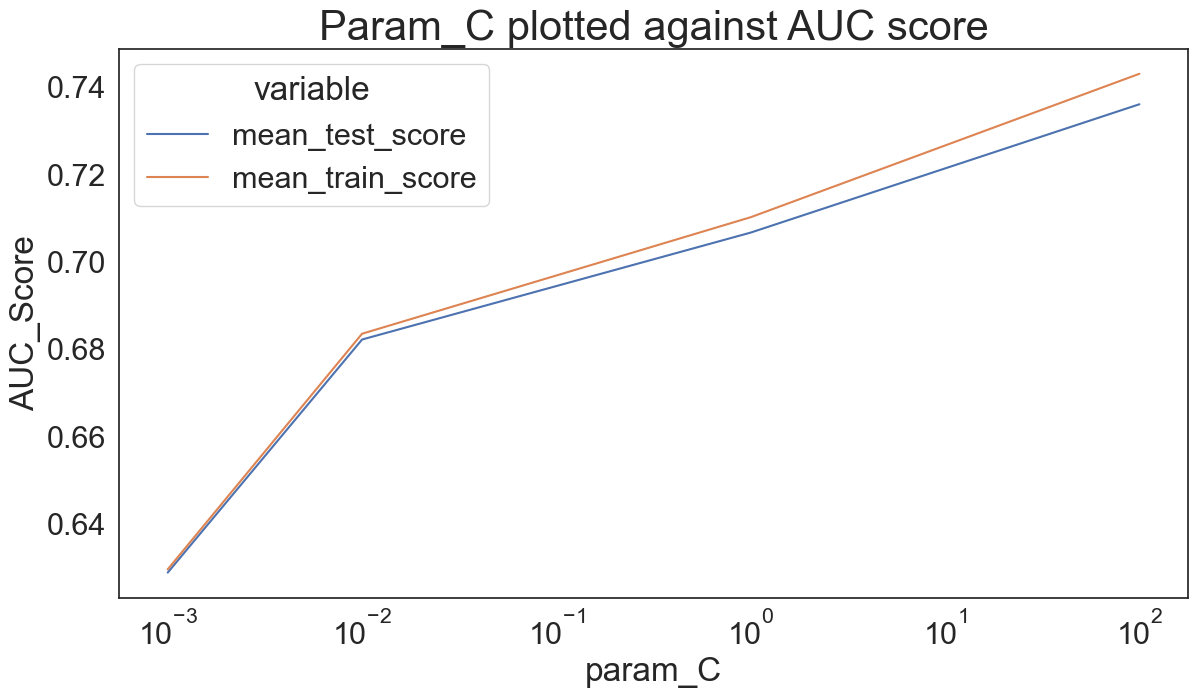

In [52]:
temp = grid_search_svm_results[grid_search_svm_results.param_kernel == "rbf"]

temp = pd.melt(temp, id_vars=[f"param_C"], value_vars=['mean_test_score', 'mean_train_score']).rename(columns = {"value": "AUC_Score"})
# temp.rename(columns = {"value": "AUC_Score"}, inplace = True)
plt.title('Param_C plotted against AUC score', fontsize= 30)

grid = sns.lineplot(data = temp, x = f"param_C", y = "AUC_Score", hue = "variable")
grid.set(xscale="log")
grid.plot()
plt.show()

In [44]:
display(grid_search_svm.best_params_)
display(grid_search_svm.best_score_)

{'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}

0.7361142981395922

In [54]:
#CONVERGING ON C PARAMATERS


#Model Training SVM GRID SEARCH



C_values = [0.001,0.1,1,100,1000,10000]



tuned_parameters = [
    {"kernel": ["rbf"], "C": C_values,  "class_weight": ["balanced"]}    
]

# param_grid_SVM = {
#     'kernel': ["linear", "rbf","poly"],
#     'C': [0,0.01,1,100],
#     "degree": [2,3],
#     'gamma': [0.01,0.1,10,100],
#     'class_weight': ["balanced"]
# }

#BY DEFAULT STRATIFIED CROSS VALIDATOIN NO NEED TO SPECIFY

grid_search2_svm = GridSearchCV(SVC(),tuned_parameters, scoring = "roc_auc",cv = 10, return_train_score=True, n_jobs = -1, refit = False, verbose = 1) 

grid_search2_svm.fit(X_res, y_res)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
                          'class_weight': ['balanced'], 'kernel': ['rbf']}],
             refit=False, return_train_score=True, scoring='roc_auc',
             verbose=1)

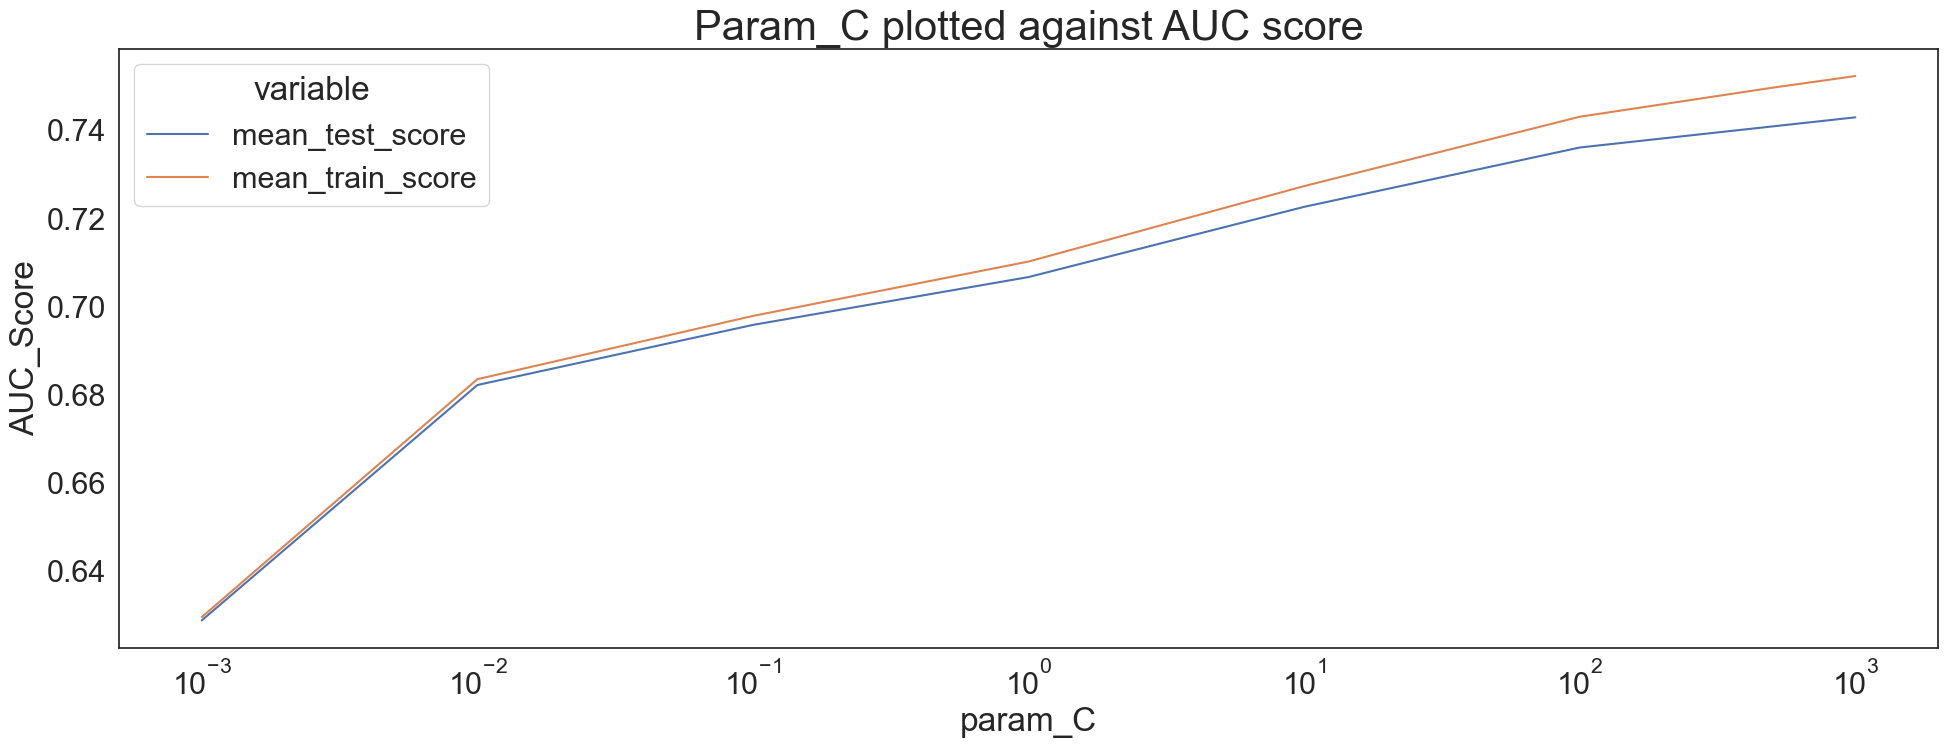

In [61]:
grid_search_svm2_results = pd.DataFrame(grid_search2_svm.cv_results_)
temp = grid_search_svm2_results[grid_search_svm2_results.param_kernel == "rbf"]

temp = pd.melt(temp, id_vars=[f"param_C"], value_vars=['mean_test_score', 'mean_train_score']).rename(columns = {"value": "AUC_Score"})
# temp.rename(columns = {"value": "AUC_Score"}, inplace = True)
plt.rcParams["figure.figsize"] = [18, 10]
plt.rcParams["figure.autolayout"] = True
plt.title('Param_C plotted against AUC score', fontsize= 30)

grid = sns.lineplot(data = temp, x = f"param_C", y = "AUC_Score", hue = "variable")
grid.set(xscale="log")
grid.plot()
plt.show()

In [55]:
display(grid_search2_svm.best_params_)
display(grid_search2_svm.best_score_)

{'C': 1000, 'class_weight': 'balanced', 'kernel': 'rbf'}

0.7429568152205392

In [36]:
#Model Training SVM GRID SEARCH

#Converging on Gamma Parameters

param_grid_SVM = {
    'kernel': ["rbf"],
    'C': [1000],
    'gamma': [0.01,0.1,10,100],
    'class_weight': ["balanced"]
}

#BY DEFAULT STRATIFIED CROSS VALIDATOIN NO NEED TO SPECIFY

grid_search_svm3 = GridSearchCV(SVC(),param_grid_SVM, scoring = "roc_auc",cv = 10, return_train_score=True, n_jobs = -1, refit = False, verbose = 1) 

grid_search_svm3.fit(X_res, y_res)



Fitting 10 folds for each of 4 candidates, totalling 40 fits


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_m

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1000], 'class_weight': ['balanced'],
                         'gamma': [0.01, 0.1, 10, 100], 'kernel': ['rbf']},
             refit=False, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [40]:
display(grid_search_svm3.best_params_)
display(grid_search_svm3.best_score_)

{'C': 1000, 'class_weight': 'balanced', 'gamma': 100, 'kernel': 'rbf'}

0.8502960242693103

In [41]:
grid_search_svm3_results = pd.DataFrame(grid_search_svm3.cv_results_)
grid_search_svm3_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_gamma,param_kernel,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,103.087173,6.420301,18.914081,1.145566,1000,balanced,0.01,rbf,"{'C': 1000, 'class_weight': 'balanced', 'gamma...",0.697958,...,0.709678,0.709487,0.710895,0.708966,0.708795,0.710288,0.708318,0.709655,0.709673,0.000790
1,135.419259,6.930797,17.770620,0.967043,1000,balanced,0.1,rbf,"{'C': 1000, 'class_weight': 'balanced', 'gamma...",0.712895,...,0.730752,0.729950,0.732827,0.730522,0.730929,0.732324,0.729940,0.731106,0.731210,0.000995
2,1148.952250,27.773902,14.459378,0.689186,1000,balanced,10,rbf,"{'C': 1000, 'class_weight': 'balanced', 'gamma...",0.761327,...,0.835120,0.832539,0.833520,0.831710,0.831343,0.832784,0.831419,0.832088,0.833370,0.001928
3,1388.867289,98.262714,8.924633,1.853325,1000,balanced,100,rbf,"{'C': 1000, 'class_weight': 'balanced', 'gamma...",0.816456,...,0.965797,0.963717,0.963421,0.963445,0.963942,0.963818,0.963961,0.963574,0.964433,0.001146


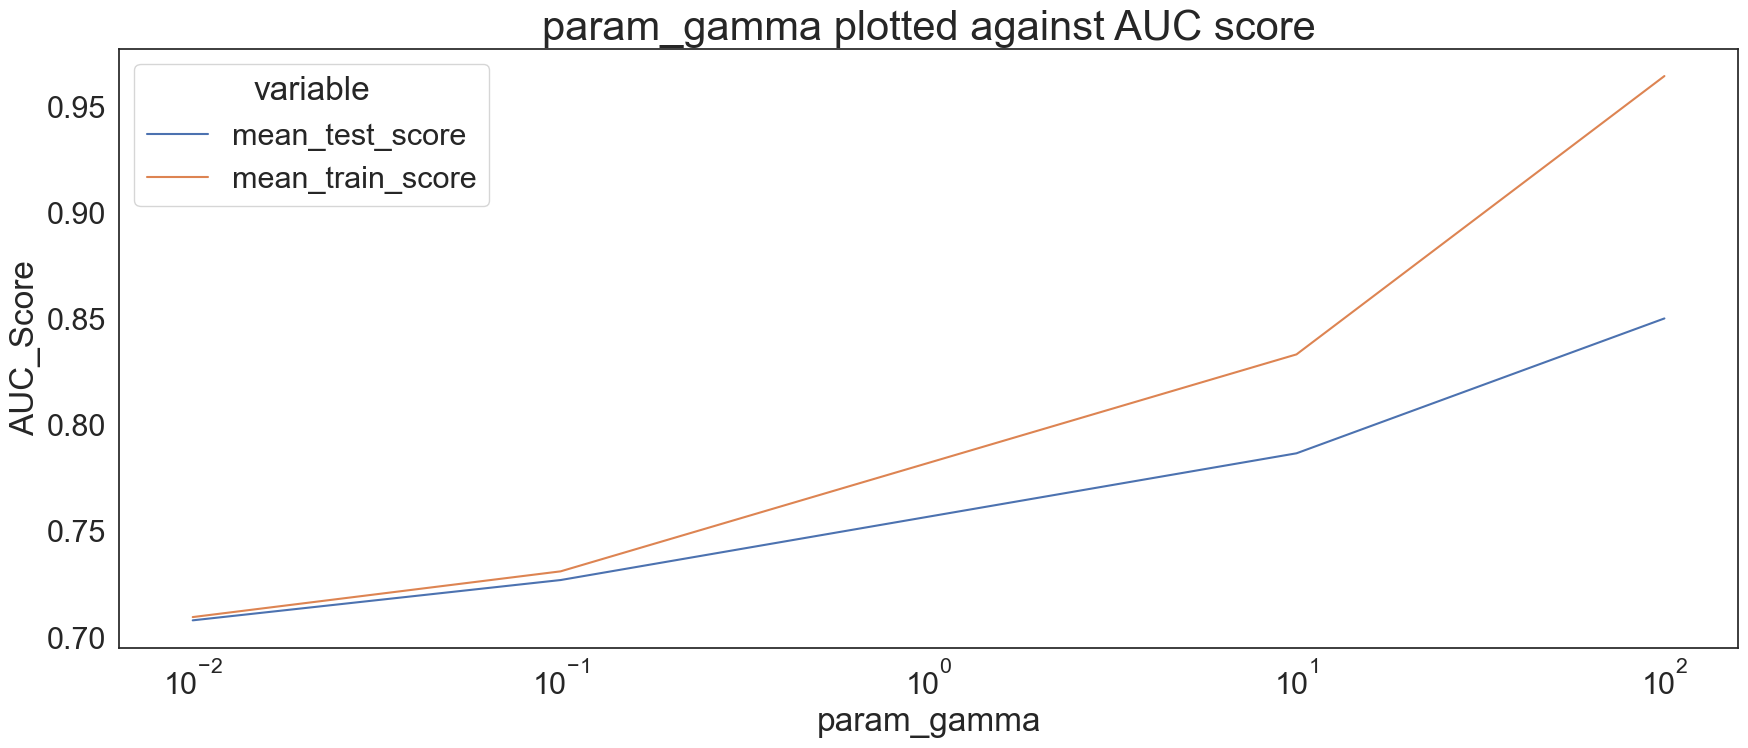

In [49]:
grid_search_svm3_results = pd.DataFrame(grid_search_svm3.cv_results_)
temp = grid_search_svm3_results[grid_search_svm3_results.param_kernel == "rbf"]

temp = pd.melt(temp, id_vars=[f"param_gamma"], value_vars=['mean_test_score', 'mean_train_score']).rename(columns = {"value": "AUC_Score"})
# temp.rename(columns = {"value": "AUC_Score"}, inplace = True)
plt.rcParams["figure.figsize"] = [18, 8]
plt.rcParams["figure.autolayout"] = True
plt.title('param_gamma plotted against AUC score', fontsize= 30)

grid = sns.lineplot(data = temp, x = f"param_gamma", y = "AUC_Score", hue = "variable")
grid.set(xscale="log")
grid.plot()
plt.show()

# Model Comparison ISI AFTER THIS COPY


## SVM Results

In [51]:
# Train the SVM model
model = SVC(C=1000, kernel= 'rbf')
model.fit(X_res, y_res)

# Make predictions on the testing data
Y_pred = model.predict(PCA_test)

# Evaluate the model's accuracy
print('Precision: %.3f' % precision_score(Y_test, Y_pred))
print('Recall: %.3f' % recall_score(Y_test, Y_pred))
print('F1: %.3f' % f1_score(Y_test, Y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))
print('ROC_AUC score: %.3f' % roc_auc_score(Y_test, Y_pred))


SVM_CHART = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True)).transpose().round(3).loc[["0", "1", "macro avg"], ["precision", "recall", "f1-score"]]
display(SVM_CHART.style.set_caption("SVM"))
display(confusion_matrix(Y_test, Y_pred))

Precision: 0.488
Recall: 0.527
F1: 0.507
Accuracy: 0.771
ROC_AUC score: 0.684


,precision,recall,f1-score
0,0.861000,0.841000,0.851000
1,0.488000,0.527000,0.507000
macro avg,0.675000,0.684000,0.679000


array([[3870,  730],
       [ 625,  696]])

In [52]:
# Train the SVM model
model = SVC(C=1000, kernel= 'rbf', gamma=10)
model.fit(X_res, y_res)

# Make predictions on the testing data
Y_pred = model.predict(PCA_test)

# Evaluate the model's accuracy
print('Precision: %.3f' % precision_score(Y_test, Y_pred))
print('Recall: %.3f' % recall_score(Y_test, Y_pred))
print('F1: %.3f' % f1_score(Y_test, Y_pred))
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred))
print('ROC_AUC score: %.3f' % roc_auc_score(Y_test, Y_pred))


SVM_CHART = pd.DataFrame(classification_report(Y_test, Y_pred, output_dict=True)).transpose().round(3).loc[["0", "1", "macro avg"], ["precision", "recall", "f1-score"]]
display(SVM_CHART.style.set_caption("SVM"))
display(confusion_matrix(Y_test, Y_pred))

Precision: 0.412
Recall: 0.533
F1: 0.465
Accuracy: 0.726
ROC_AUC score: 0.657


,precision,recall,f1-score
0,0.853000,0.781000,0.816000
1,0.412000,0.533000,0.465000
macro avg,0.633000,0.657000,0.640000


array([[3594, 1006],
       [ 617,  704]])

## K Nearest Neighbours

In [57]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
model = KNeighborsClassifier(n_neighbors=1000,leaf_size=75,weights='distance',p=1)
model.fit(X_res, y_res)

# Make predictions on the testing data
Y_pred2 = model.predict(PCA_test)

# Evaluate the model's accuracy
print('Precision: %.3f' % precision_score(Y_test, Y_pred2))
print('Recall: %.3f' % recall_score(Y_test, Y_pred2))
print('F1: %.3f' % f1_score(Y_test, Y_pred2))
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred2))
print('ROC_AUC score: %.3f' % roc_auc_score(Y_test, Y_pred2))

# display("KNN")
KNN_CHART = pd.DataFrame(classification_report(Y_test, Y_pred2, output_dict=True)).transpose().round(3).loc[["0", "1", "macro avg"], ["precision", "recall", "f1-score"]]
display(KNN_CHART.style.set_caption("KNN"))
display(confusion_matrix(Y_test, Y_pred2))

Precision: 0.475
Recall: 0.520
F1: 0.497
Accuracy: 0.765
ROC_AUC score: 0.678


,precision,recall,f1-score
0,0.858000,0.835000,0.847000
1,0.475000,0.520000,0.497000
macro avg,0.667000,0.678000,0.672000


array([[3842,  758],
       [ 634,  687]])

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy',
                              max_depth = 30, min_samples_leaf = 6,
                              min_samples_split = 6, n_estimators = 200)


model.fit(X_res, y_res)
Y_pred3 = model.predict(PCA_test)

# Evaluate the model's accuracy
print('Precision: %.3f' % precision_score(Y_test, Y_pred3))
print('Recall: %.3f' % recall_score(Y_test, Y_pred3))
print('F1: %.3f' % f1_score(Y_test, Y_pred3))
print('Accuracy: %.3f' % accuracy_score(Y_test, Y_pred3))
print('ROC_AUC score: %.3f' % roc_auc_score(Y_test, Y_pred3))


RF_CHART = pd.DataFrame(classification_report(Y_test, Y_pred3, output_dict=True)).transpose().round(3).loc[["0", "1", "macro avg"], ["precision", "recall", "f1-score"]]
display(RF_CHART.style.set_caption("Random Forest"))
display(confusion_matrix(Y_test, Y_pred3))

Precision: 0.422
Recall: 0.540
F1: 0.474
Accuracy: 0.732
ROC_AUC score: 0.664


,precision,recall,f1-score
0,0.856000,0.787000,0.820000
1,0.422000,0.540000,0.474000
macro avg,0.639000,0.664000,0.647000


array([[3621,  979],
       [ 607,  714]])

## ROC Curve

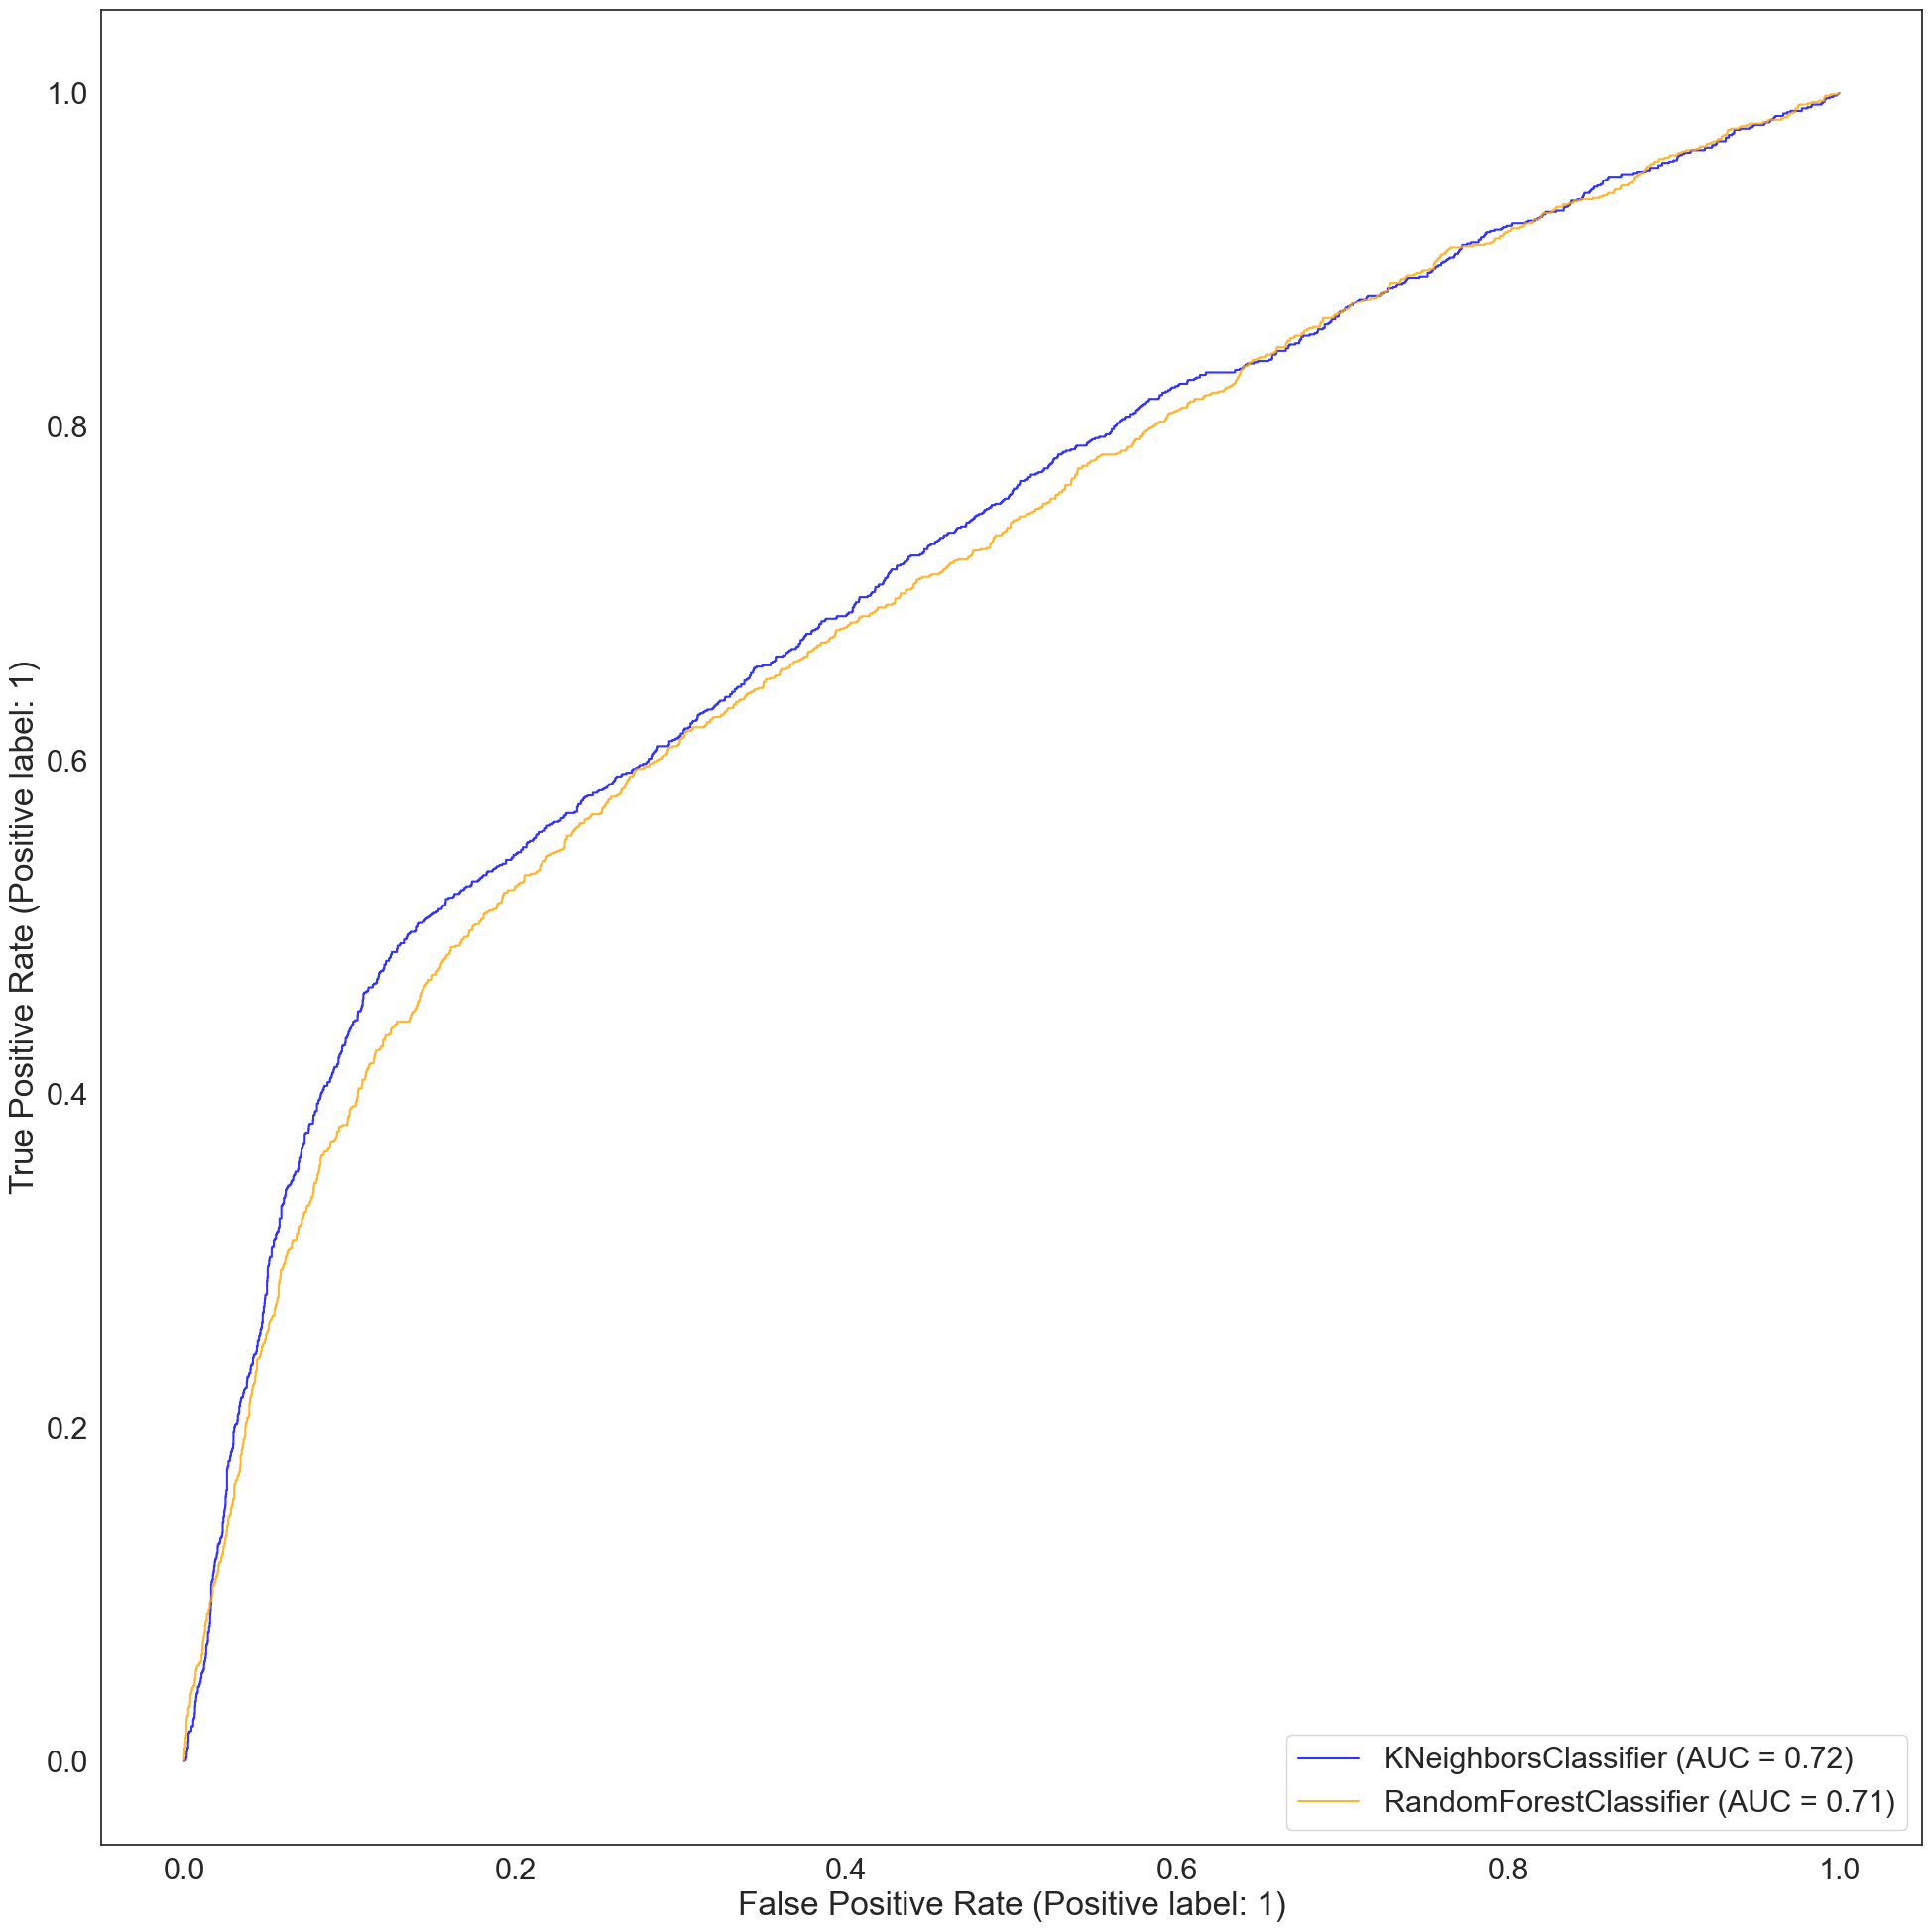

In [75]:
KNNmodel = KNeighborsClassifier(n_neighbors=1000,leaf_size=75,weights='distance',p=1)
KNNmodel.fit(X_res, y_res)

RFmodel = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy',
                              max_depth = 30, min_samples_leaf = 6,
                              min_samples_split = 6, n_estimators = 200)
RFmodel.fit(X_res, y_res)

SVMmodel = SVC(C=1000, kernel= 'rbf', gamma=10)
SVMmodel.fit(X_res, y_res)


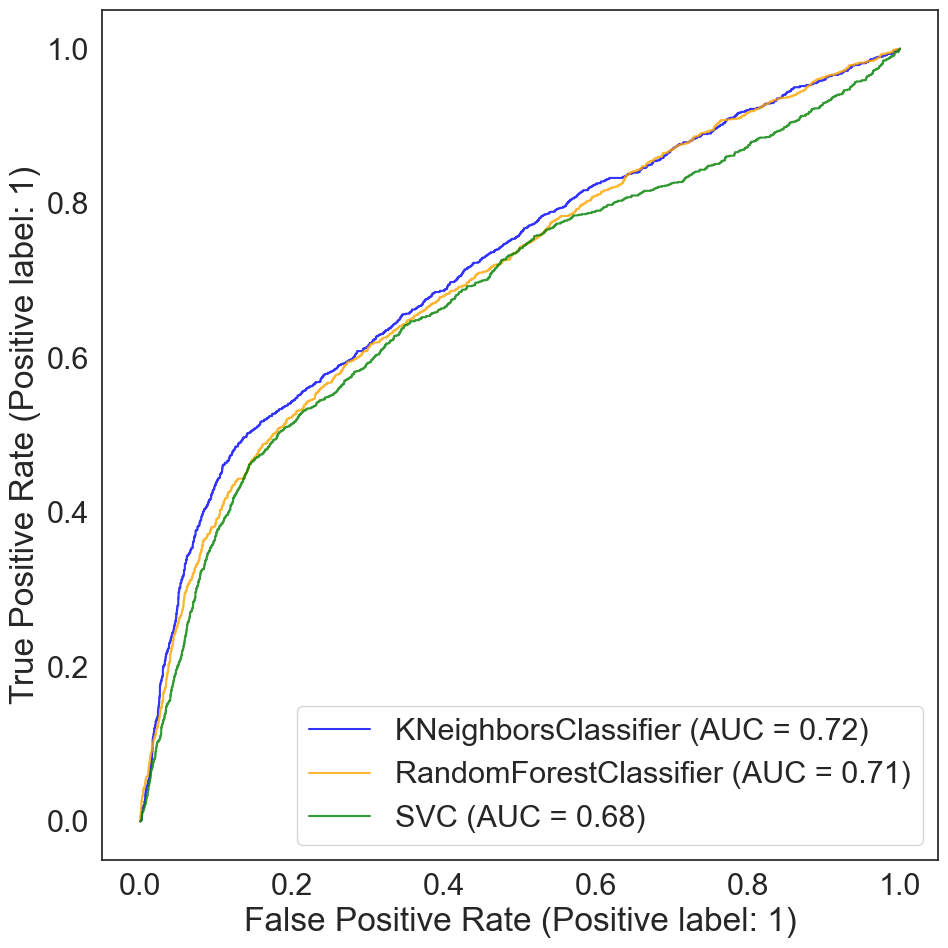

In [79]:
ax = plt.subplots(figsize=(10, 10))

ax = plt.gca()
KNN_disp = RocCurveDisplay.from_estimator(KNNmodel, PCA_test, Y_test, ax=ax, alpha=0.8, color = "blue")

ax = plt.gca()
RF_disp = RocCurveDisplay.from_estimator(RFmodel, PCA_test, Y_test, ax=ax, alpha=0.8, color = "orange")

ax = plt.gca()
SVM_disp = RocCurveDisplay.from_estimator(SVMmodel, PCA_test, Y_test, ax=ax, alpha=0.8, color = "green")

plt.savefig('ROC curve')
plt.show()

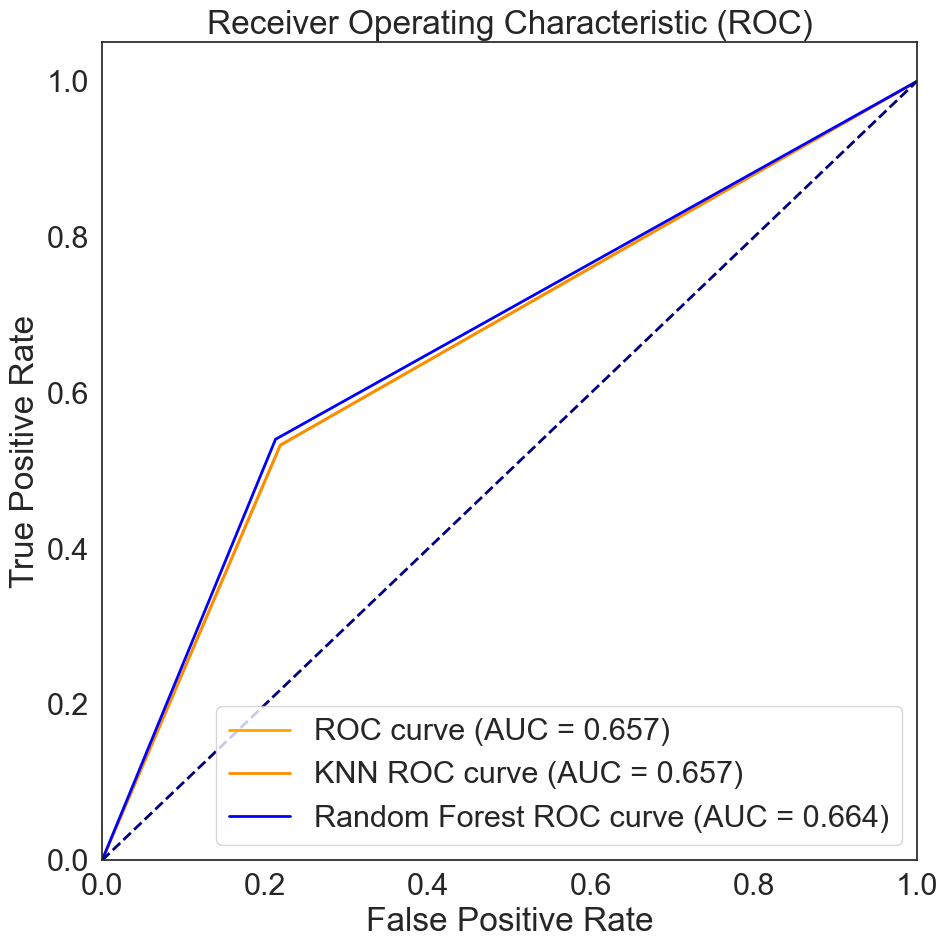

In [61]:

# Compute the false positive rate and true positive rate for the SVM model
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

# Compute the false positive rate and true positive rate for the KNN model
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, Y_pred2)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute the false positive rate and true positive rate for the Random Forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_pred3)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure()
plt.rcParams["figure.figsize"] = [20, 20]

#SVM
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)

# Plot the ROC curve for KNN
plt.plot(fpr, tpr, color='darkorange', lw=2, label='KNN ROC curve (AUC = %0.3f)' % roc_auc)

# Plot the ROC curve for Random Forest model
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest ROC curve (AUC = %0.3f)' % roc_auc_rf)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()